## Overview
* Some customer information and their associated loan information.
* The loan was taken to buy a product and hence the product ID and their details are also provided.
* Each product has a supplier. Also the products are bought via a partner

## Objective
> * [X] Clean the data,
> * [ ] do exploratory data analysis on it and
> * [ ] infer from the data about the trends in loans taken and products bought

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
 # flat nested list, pass as list(flatten(<___>))
flatten = lambda *n: (e for a in n for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,)))

In [3]:
# setting to show all the columns
pd.set_option('display.max_columns', None)  

# Cleaning

In [4]:
df = pd.read_csv("data.csv")
df.tail()

Unnamed: 0                            Village  Group ID  Member ID  \
4995        4995                           Horanadu    862449          8   
4996        4996  W/O Krishna,Omkara, SHG,Kodibettu    673359          1   
4997        4997                 Uralichikkanahalli    477383          6   
4998        4998                           Keregodu    390436          4   
4999        4999                         Maniknagar    916894          4   

        Branch Name   Circle Name Loan Amount               Product Type  \
4995      Moodigere        Kalasa        2350  Greenway Jumbo Stove GJS1   
4996          Udupi       Manipal       26000          Solar Light Selco   
4997  Doddaballapur  Hesarughatta        2350  Greenway Jumbo Stove GJS1   
4998         Mandya      KEREGODU        2350  Greenway Jumbo Stove GJS1   
4999       Homnabad     Humanabad        2350  Greenway Jumbo Stove GJS1   

     Name of Model Product Detail Institution Name        Manufacturer Name  \
4995          GJS1            NaN           SKDRDP  Greenway Grameena Infra   
4996        SB8HLS          8 CFL           SKDRDP                    SELCO   
4997          GJS1            NaN           SKDRDP  Greenway Grameena Infra   
4998          GJS1            NaN           SKDRDP  Greenway Grameena Infra   
4999          GJS1            NaN           SKDRDP  Greenway Grameena Infra   

      Loan Account Number      Loan Application Date  \
4995               296670  2019-03-05T00:00:00+05:30   
4996               766414  2018-09-22T00:00:00+05:30   
4997               125876  2018-01-23T00:00:00+05:30   
4998               308527  2019-03-09T00:00:00+05:30   
4999               165467  2019-01-07T00:00:00+05:30   

         Product Installed Date    Document Signature Date     loan_id  \
4995  2019-03-06T00:00:00+05:30  2019-03-05T00:00:00+05:30    6-296670   
4996  2018-09-25T00:00:00+05:30  2018-09-22T00:00:00+05:30   11-766414   
4997  2018-01-24T00:00:00+05:30  2018-01-23T00:00:00+05:30  122-125876   
4998  2019-03-12T00:00:00+05:30  2019-03-09T00:00:00+05:30  105-308527   
4999  2019-01-11T00:00:00+05:30  2019-01-07T00:00:00+05:30  154-165467   

     household_id  product_id  branch_id  partner_id  
4995     862449-8        38.0        6.0           1  
4996     673359-1        47.0       11.0           1  
4997     477383-6        38.0      114.0           1  
4998     390436-4        38.0       97.0           1  
4999     916894-4        38.0      142.0           1

In [5]:
df.shape

(5000, 21)

In [6]:
# for ease of use
df.columns = ["0","village","group_id","member_id","branch_name","circle_name","loan_amount","product_type","name_of_model","product_detail","institution_name","manufacturer_name","loan_account_number","loan_application_date","product_installed_date","document_signature_date","loan_id","household_id","product_id","branch_id","partner_id"]

In [7]:
# to check the type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
0                          5000 non-null int64
village                    4993 non-null object
group_id                   5000 non-null int64
member_id                  5000 non-null int64
branch_name                5000 non-null object
circle_name                5000 non-null object
loan_amount                5000 non-null object
product_type               5000 non-null object
name_of_model              5000 non-null object
product_detail             1413 non-null object
institution_name           5000 non-null object
manufacturer_name          5000 non-null object
loan_account_number        5000 non-null int64
loan_application_date      5000 non-null object
product_installed_date     5000 non-null object
document_signature_date    5000 non-null object
loan_id                    5000 non-null object
household_id               5000 non-null object
product_id                 5000 n

In [8]:
# basic stats of numerical columns
df.describe()

0      group_id    member_id  loan_account_number  \
count  5000.000000  5.000000e+03  5000.000000           5000.00000   
mean   2499.500000  5.066653e+05     5.825800         201142.47300   
std    1443.520003  3.125040e+05     4.286809         163979.74666   
min       0.000000  6.200000e+01     1.000000          15500.00000   
25%    1249.750000  2.400830e+05     2.000000         105375.00000   
50%    2499.500000  4.804345e+05     5.000000         154798.00000   
75%    3749.250000  7.864768e+05     9.000000         231153.50000   
max    4999.000000  1.075262e+06    28.000000         979302.00000   

        product_id    branch_id  partner_id  
count  5000.000000  5000.000000      5000.0  
mean     38.639800   119.330400         1.0  
std       3.121475   302.577186         0.0  
min      23.000000     2.000000         1.0  
25%      38.000000    43.000000         1.0  
50%      38.000000    82.000000         1.0  
75%      38.000000   131.000000         1.0  
max      50.000000  2574.000000         1.0

## Inspecting the values in each column

In [9]:
## Displaying the types in each column
interested_columns = []
for i in ["village","group_id","member_id","branch_name","circle_name","product_type","name_of_model","product_detail","institution_name","manufacturer_name","loan_account_number","loan_id","household_id","product_id","branch_id","partner_id"]:
    print("{} =============================================================".format(i))
    print("There are {} different values in '{}'".format(len(df[i].unique()),i))
    if(len(df[i].unique())<100):
        interested_columns.append(i)
    print(df[i].value_counts())
print("========================================================================")    
print("The following columns are having less unique items:")
[print(i) for i in interested_columns]

village =============================================================
There are 2544 different values in 'village'
Bijapur CMC                34
Challakere                 20
Soravanahalli              18
MYSORE CITY CORPORATION    17
Sirigere                   17
                           ..
Somasagar                   1
Araluguppe                  1
Kanuru                      1
Megaravalli                 1
SASALAKUNTE                 1
Name: village, Length: 2543, dtype: int64
group_id =============================================================
There are 4603 different values in 'group_id'
40136      4
240083     4
88153      4
556516     3
20547      3
          ..
1025258    1
851173     1
912611     1
511199     1
386639     1
Name: group_id, Length: 4603, dtype: int64
member_id =============================================================
There are 27 different values in 'member_id'
1     813
2     616
3     512
5     417
4     406
6     342
7     311
9     286
8     264
10 

[None, None, None, None, None, None, None, None]

#### VILLAGE

In [10]:
# villages with no value
df[df["village"].isnull()]

0 village  group_id  member_id branch_name circle_name loan_amount  \
433    433     NaN    446208          1   Siruguppa   HACHHOLLI        2350   
646    646     NaN    446593          2   Siruguppa   SIRAGUPPA        2350   
1220  1220     NaN    445630         11   Siruguppa    SIRIGERI        2350   
1405  1405     NaN    445214          2   Siruguppa   SIRAGUPPA        2350   
3105  3105     NaN    445175          3   Siruguppa   HACHHOLLI        2350   
4080  4080     NaN    445630          1   Siruguppa    SIRIGERI        2350   
4682  4682     NaN    446593          6   Siruguppa   SIRAGUPPA        2350   

                   product_type name_of_model product_detail institution_name  \
433   Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   
646   Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   
1220  Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   
1405  Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   
3105  Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   
4080  Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   
4682  Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   

            manufacturer_name  loan_account_number      loan_application_date  \
433   Greenway Grameena Infra               126941  2019-03-09T00:00:00+05:30   
646   Greenway Grameena Infra               127213  2019-03-12T00:00:00+05:30   
1220  Greenway Grameena Infra               126816  2019-03-07T00:00:00+05:30   
1405  Greenway Grameena Infra               126489  2019-03-05T00:00:00+05:30   
3105  Greenway Grameena Infra               126859  2019-03-09T00:00:00+05:30   
4080  Greenway Grameena Infra               126811  2019-03-07T00:00:00+05:30   
4682  Greenway Grameena Infra               127215  2019-03-12T00:00:00+05:30   

         product_installed_date    document_signature_date     loan_id  \
433   2019-03-11T00:00:00+05:30  2019-03-09T00:00:00+05:30  116-126941   
646   2019-03-13T00:00:00+05:30  2019-03-12T00:00:00+05:30  116-127213   
1220  2019-03-08T00:00:00+05:30  2019-03-07T00:00:00+05:30  116-126816   
1405  2019-03-06T00:00:00+05:30  2019-03-05T00:00:00+05:30  116-126489   
3105  2019-03-11T00:00:00+05:30  2019-03-09T00:00:00+05:30  116-126859   
4080  2019-03-08T00:00:00+05:30  2019-03-07T00:00:00+05:30  116-126811   
4682  2019-03-13T00:00:00+05:30  2019-03-12T00:00:00+05:30  116-127215   

     household_id  product_id  branch_id  partner_id  
433      446208-1        38.0      108.0           1  
646      446593-2        38.0      108.0           1  
1220    445630-11        38.0      108.0           1  
1405     445214-2        38.0      108.0           1  
3105     445175-3        38.0      108.0           1  
4080     445630-1        38.0      108.0           1  
4682     446593-6        38.0      108.0           1

In [11]:
# replacing no value with "Unknown"
df.village.fillna("Not Available",inplace=True)

In [12]:
# without making them all lower
len(df.village.unique())

2543

In [13]:
# actual count
len(df.village.apply(lambda s: s.lower()).unique())

2498

> ### Including "Unknown", 2499 distinct villages 

#### Group_id

(array([712., 389., 485., 728., 352., 704., 308., 281., 640., 401.]),
 array([6.200000e+01, 1.075820e+05, 2.151020e+05, 3.226220e+05,
        4.301420e+05, 5.376620e+05, 6.451820e+05, 7.527020e+05,
        8.602220e+05, 9.677420e+05, 1.075262e+06]),
 <a list of 10 Patch objects>)

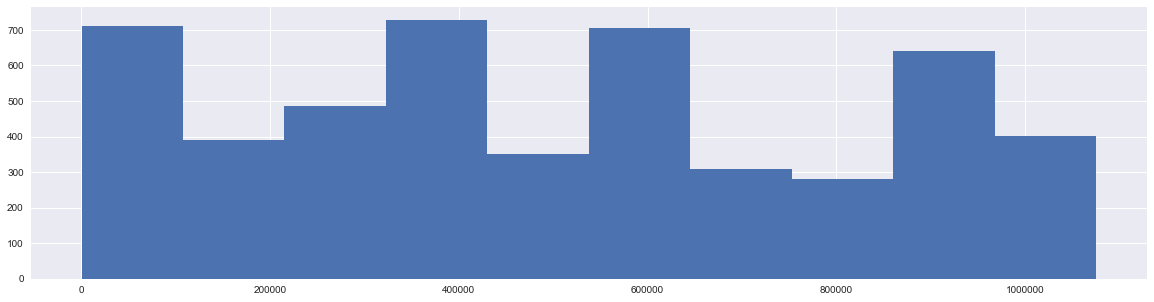

In [14]:
plt.figure(figsize=(20,5))
plt.hist(df.group_id)

> ### No particular pattern here

#### Member_id

In [15]:
len(df.member_id.unique())

27

(array([1941., 1165.,  861.,  450.,  400.,  130.,   28.,   17.,    4.,
           4.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <a list of 10 Patch objects>)

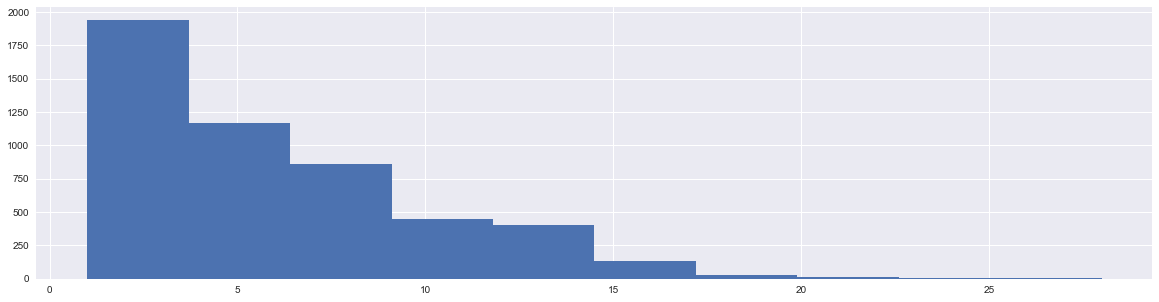

In [16]:
plt.figure(figsize=(20,5))
plt.hist(df.member_id)

> ### Clear pattern of decreasing count as the member_id increases, but why ???

#### Branch name and branch_id

In [17]:
len(df.branch_name.unique())

160

(array([588., 753., 753., 643., 515., 454., 444., 361., 319., 170.]),
 array([  0. ,  15.9,  31.8,  47.7,  63.6,  79.5,  95.4, 111.3, 127.2,
        143.1, 159. ]),
 <a list of 10 Patch objects>)

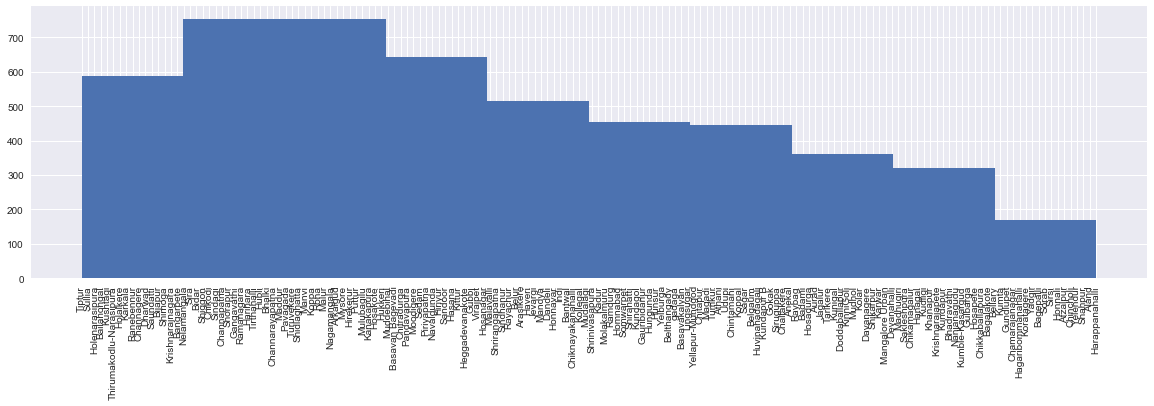

In [18]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.hist(df.branch_name)

> ### Same distribution for branch_id

In [19]:
# map for branch_id and branch_name
branch = df.drop_duplicates(subset=["branch_id","branch_name"])
set(zip(branch[["branch_id","branch_name"]]['branch_id'],branch[["branch_id","branch_name"]]['branch_name']))

{(2.0, 'Belthangady'),
 (3.0, 'Karkala'),
 (4.0, 'Sullia'),
 (5.0, 'Puttur'),
 (6.0, 'Moodigere'),
 (7.0, 'Mangalore Urban'),
 (8.0, 'KinniGoli'),
 (9.0, 'Karwar'),
 (10.0, 'Bantwal'),
 (11.0, 'Udupi'),
 (12.0, 'Kundapur'),
 (13.0, 'Dandeli'),
 (14.0, 'Sirsi'),
 (15.0, 'Hosanagar'),
 (16.0, 'Kumta'),
 (17.0, 'Honnavar'),
 (19.0, 'Tarikere'),
 (20.0, 'Kadur'),
 (21.0, 'Tirthahalli'),
 (22.0, 'Koppa'),
 (23.0, 'Shimoga'),
 (24.0, 'Sagar'),
 (25.0, 'Sorab'),
 (26.0, 'Shikarpur'),
 (27.0, 'Chikamagalur'),
 (28.0, 'Virajpet'),
 (29.0, 'Somwarpet'),
 (30.0, 'Dharwad'),
 (31.0, 'Hubli'),
 (32.0, 'Navalgunda'),
 (33.0, 'Shiggon'),
 (34.0, 'Ranebennur'),
 (35.0, 'Haveri'),
 (36.0, 'Rona'),
 (37.0, 'Shirahatti'),
 (38.0, 'gadaga'),
 (39.0, 'Yellapur-Mundgod'),
 (40.0, 'Bhadravathi'),
 (41.0, 'Athani'),
 (42.0, 'Raybag'),
 (43.0, 'Chikodi'),
 (44.0, 'Hukkeri'),
 (45.0, 'Gokak'),
 (46.0, 'Ramdurg'),
 (47.0, 'Saundatti'),
 (48.0, 'Bailahongal'),
 (49.0, 'Belgaum'),
 (50.0, 'Khanapur'),
 (51.0, 'Pav

In [20]:
# proof that its 1:1 mapping
for i in df['branch_id'].unique():
    if(len(df[df['branch_id']==i]["branch_name"].unique())>1):
        print(i)

#### Circle name

In [21]:
len(df.circle_name.unique())

1015

In [22]:
# actual unique circle names:
len(df.circle_name.apply(lambda s: s.lower()).unique())

985

> ### 985 unique circle names

#### Loan amount

In [23]:
# the only real numeric column (loan amount) is an object, to convert it 
df["loan_amount"].unique()

array(['15500', '53000', '9000', '8000', '36000', '2350', '11000', '9500',
       '1240', '10300', '20000', '12500', '13800', '10500', '15750',
       '43750', '15700', '45000', '14500', '11500', '12174', '26000',
       '23000', '16500', '8500', '15000', '12800', '30000', '10000',
       '1300', '14750', '11300', '7500', '14000', '24000', '11800',
       '1260', '10195', '25000', '8250', '15300', '7000', '22000',
       '46000', '21000', '19000', '35000', '9600', '13000', '27000',
       '24500', '13900', '29000', '7260', '36500', '29500', '13500',
       '16300', '34000', '12000', '9400', '61000', '38000', '9300',
       '15600', '17500', '26600', '2480', '13300', '12300', '15800',
       '8300', '2500', '28000', '21900', '7876', '50000', '26950', '8282',
       '28500', '2017-12-09T00:00:00+05:30', '90000', '13980', '16000',
       '14300', '7655', '10164'], dtype=object)

In [24]:
# a time type in loan amount doesn seem right, replacing it with nan
df["loan_amount"] = df["loan_amount"].apply(lambda s: np.nan if "-" in s else s)
df["loan_amount"] = df["loan_amount"].astype(float)

#### Product type

<BarContainer object of 3 artists>

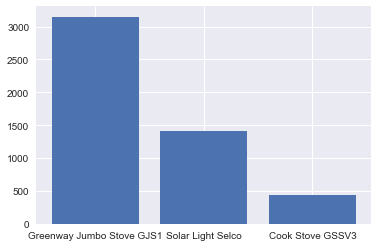

In [25]:
plt.bar(df.product_type.value_counts().index,df.product_type.value_counts().values)

#### Name of model

<BarContainer object of 14 artists>

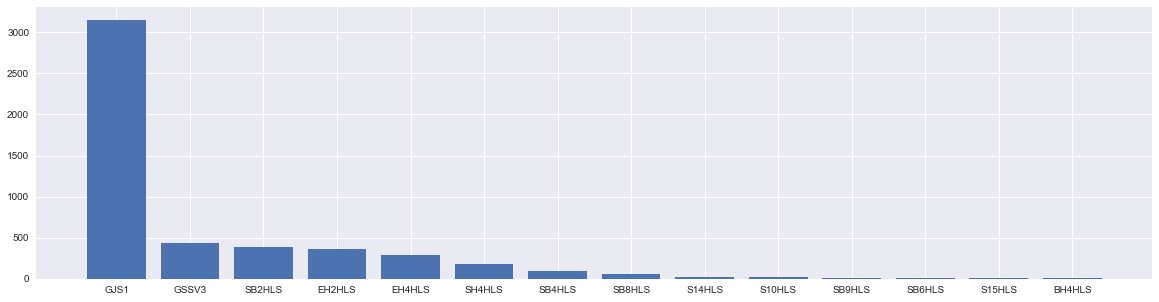

In [26]:
plt.figure(figsize=(20,5))
plt.bar(df.name_of_model.value_counts().index,df.name_of_model.value_counts().values)

In [27]:
df.groupby(['product_type',"name_of_model"]).sum()

0    group_id  member_id  \
product_type              name_of_model                                   
Cook Stove GSSV3          GSSV3          1055329   188182439       2502   
Greenway Jumbo Stove GJS1 GJS1           7920611  1647897597      18292   
Solar Light Selco         BH4HLS           14740     3347593         27   
                          EH2HLS          861339   159509723       2099   
                          EH4HLS          747977   139879614       1910   
                          S10HLS           37738     7093936         83   
                          S14HLS           31365    10833114         91   
                          S15HLS           11366     3992198         34   
                          SB2HLS          990382   187632471       2135   
                          SB4HLS          234901    53366048        563   
                          SB6HLS           14443     4009958         39   
                          SB8HLS          144269    32601620        306   
                          SB9HLS           19378     3011337         25   
                          SH4HLS          413662    91968984       1023   

                                         loan_amount  loan_account_number  \
product_type              name_of_model                                     
Cook Stove GSSV3          GSSV3             541400.0             49310303   
Greenway Jumbo Stove GJS1 GJS1             7405260.0            608487387   
Solar Light Selco         BH4HLS            105000.0              2181416   
                          EH2HLS           3098373.0             70974299   
                          EH4HLS           3698054.0             67994850   
                          S10HLS            575500.0              4470810   
                          S14HLS            763750.0              5718588   
                          S15HLS            300000.0              2060922   
                          SB2HLS           3911359.0             82064451   
                          SB4HLS           1630400.0             21927420   
                          SB6HLS            135900.0              2215540   
                          SB8HLS           1468050.0             26596609   
                          SB9HLS            204500.0               930271   
                          SH4HLS           2762650.0             60779499   

                                         product_id  branch_id  partner_id  
product_type              name_of_model                                     
Cook Stove GSSV3          GSSV3             16132.0    44844.0         436  
Greenway Jumbo Stove GJS1 GJS1             119738.0   412139.0        3151  
Solar Light Selco         BH4HLS              115.0      140.0           5  
                          EH2HLS            12495.0    36146.0         357  
                          EH4HLS            10404.0    19067.0         289  
                          S10HLS              640.0      891.0          16  
                          S14HLS              697.0      264.0          17  
                          S15HLS              210.0       91.0           5  
                          SB2HLS            16426.0    46845.0         382  
                          SB4HLS             4004.0     8339.0          91  
                          SB6HLS              276.0     2950.0           6  
                          SB8HLS             2726.0     2691.0          58  
                          SB9HLS              336.0      533.0           7  
                          SH4HLS             9000.0    21712.0         180

> ### Clearly this is the mapping:
> Cook Stove GSSV3 : GSSV3

> Greenway Jumbo Stove GJS1 : GJS1

> Solar Light Selco : anything else

#### Product detail

In [28]:
# rows with product details
df[~df.product_detail.isnull()].shape

(1413, 21)

<BarContainer object of 12 artists>

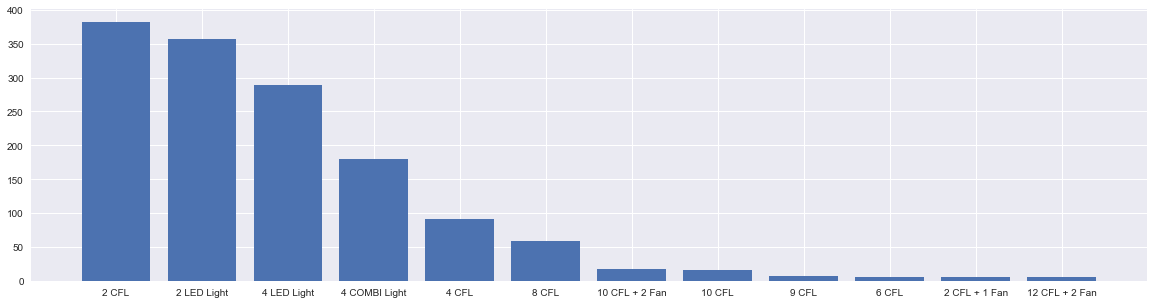

In [29]:
plt.figure(figsize=(20,5))
plt.bar(df.product_detail.value_counts().index,df.product_detail.value_counts().values)

In [30]:
list(df.product_detail.value_counts().index)

['2 CFL',
 '2 LED Light',
 '4 LED Light',
 '4 COMBI Light',
 '4 CFL',
 '8 CFL',
 '10 CFL + 2 Fan',
 '10 CFL',
 '9 CFL',
 '6 CFL',
 '2 CFL + 1 Fan',
 '12 CFL + 2 Fan']

In [31]:
# unique items
list(set(list(flatten([[i.strip(" ").strip(" +") for i in re.findall('\D+',i)] for i in list(df.product_detail.value_counts().index)]))))

['LED Light', 'CFL', 'Fan', 'COMBI Light']

In [32]:
df.product_detail.value_counts()

2 CFL             382
2 LED Light       357
4 LED Light       289
4 COMBI Light     180
4 CFL              91
8 CFL              58
10 CFL + 2 Fan     17
10 CFL             16
9 CFL               7
6 CFL               6
2 CFL + 1 Fan       5
12 CFL + 2 Fan      5
Name: product_detail, dtype: int64

#### Product count
> * LED : 1434
> * Fan : 49
> * CFL : 2091
> * Combi : 720
> * total : 4294

In [99]:
df[df.product_detail!=""]["product_type"].value_counts()

solar light selco    1413
Name: product_type, dtype: int64

> ### Solar Light Selco is the only one with description 

#### Manufacturers name

<BarContainer object of 2 artists>

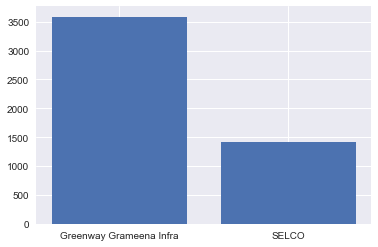

In [33]:
plt.bar(df.manufacturer_name.value_counts().index,df.manufacturer_name.value_counts().values)

In [34]:
df.groupby(['manufacturer_name','product_type',"name_of_model"]).sum()

0  \
manufacturer_name       product_type              name_of_model            
Greenway Grameena Infra Cook Stove GSSV3          GSSV3          1055329   
                        Greenway Jumbo Stove GJS1 GJS1           7920611   
SELCO                   Solar Light Selco         BH4HLS           14740   
                                                  EH2HLS          861339   
                                                  EH4HLS          747977   
                                                  S10HLS           37738   
                                                  S14HLS           31365   
                                                  S15HLS           11366   
                                                  SB2HLS          990382   
                                                  SB4HLS          234901   
                                                  SB6HLS           14443   
                                                  SB8HLS          144269   
                                                  SB9HLS           19378   
                                                  SH4HLS          413662   

                                                                   group_id  \
manufacturer_name       product_type              name_of_model               
Greenway Grameena Infra Cook Stove GSSV3          GSSV3           188182439   
                        Greenway Jumbo Stove GJS1 GJS1           1647897597   
SELCO                   Solar Light Selco         BH4HLS            3347593   
                                                  EH2HLS          159509723   
                                                  EH4HLS          139879614   
                                                  S10HLS            7093936   
                                                  S14HLS           10833114   
                                                  S15HLS            3992198   
                                                  SB2HLS          187632471   
                                                  SB4HLS           53366048   
                                                  SB6HLS            4009958   
                                                  SB8HLS           32601620   
                                                  SB9HLS            3011337   
                                                  SH4HLS           91968984   

                                                                 member_id  \
manufacturer_name       product_type              name_of_model              
Greenway Grameena Infra Cook Stove GSSV3          GSSV3               2502   
                        Greenway Jumbo Stove GJS1 GJS1               18292   
SELCO                   Solar Light Selco         BH4HLS                27   
                                                  EH2HLS              2099   
                                                  EH4HLS              1910   
                                                  S10HLS                83   
                                                  S14HLS                91   
                                                  S15HLS                34   
                                                  SB2HLS              2135   
                                                  SB4HLS               563   
                                                  SB6HLS                39   
                                                  SB8HLS               306   
                                                  SB9HLS                25   
                                                  SH4HLS              1023   

                                                                 loan_amount  \
manufacturer_name       product_type              name_of_model                
Greenway Grameena Infra Cook Stove GSSV3          GSSV3             541400.0   
                        Greenway Jumbo Stove GJS1 GJS1             7405260.0   
SELCO               

> ### As expected from the names, Greenway Grameena Infra owns Stoves and SELCO owns Solar lights

#### Loan account number

In [35]:
# duplicates exist
len(df.loan_account_number.unique())

4950

In [36]:
df[df.duplicated(subset="loan_account_number",keep=False)].sort_values('loan_account_number')

0                  village  group_id  member_id  \
3811  3811                 ANDALAGI    141565          7   
4604  4604          GUDEMARANAHALLI    605838          6   
2617  2617               Kiragasuru    222932          2   
3261  3261             Madikeshirur    946304         10   
3496  3496              HANCHIKUPPE    605297         14   
...    ...                      ...       ...        ...   
2572  2572               Tukkanatti     76177          9   
2955  2955                 Horanadu    861562         15   
3351  3351          Rehamath nagara    568719         11   
2616  2616                   Maskal    320751          9   
2962  2962  MYSORE CITY CORPORATION    218916          2   

                  branch_name   circle_name  loan_amount  \
3811                  Shiggon      Dundashi       9500.0   
4604                   Magadi        SOLURU       1240.0   
2617  Thirumakodlu-Narasipura  T.Narasipura      15600.0   
3261               Muddebihal     DHAVALAGI       2350.0   
3496                   Magadi       MADABAL       1240.0   
...                       ...           ...          ...   
2572                 Mudalagi       Rajapur       2350.0   
2955                Moodigere        Kalasa      12800.0   
3351                    Kolar      Purasabe       2350.0   
2616                  Hiriyur        Babbur       2350.0   
2962                   Mysore  MANDIMOHALLA       2350.0   

                   product_type name_of_model product_detail institution_name  \
3811          Solar Light Selco        SB2HLS          2 CFL           SKDRDP   
4604           Cook Stove GSSV3         GSSV3            NaN           SKDRDP   
2617          Solar Light Selco        SB4HLS          4 CFL           SKDRDP   
3261  Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   
3496           Cook Stove GSSV3         GSSV3            NaN           SKDRDP   
...                         ...           ...            ...              ...   
2572  Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   
2955          Solar Light Selco        EH4HLS    4 LED Light           SKDRDP   
3351  Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   
2616  Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   
2962  Greenway Jumbo Stove GJS1          GJS1            NaN           SKDRDP   

            manufacturer_name  loan_account_number      loan_application_date  \
3811                    SELCO                55401  2017-10-02T00:00:00+05:30   
4604  Greenway Grameena Infra                55401  2017-10-09T00:00:00+05:30   
2617                    SELCO                65558  2017-10-23T00:00:00+05:30   
3261  Greenway Grameena Infra                65558  2018-12-30T00:00:00+05:30   
3496  Greenway Grameena Infra                69582  2017-12-02T00:00:00+05:30   
...                       ...                  ...                        ...   
2572  Greenway Grameena Infra               187021  2019-01-21T00:00:00+05:30   
2955                    SELCO               214215  2017-10-10T00:00:00+05:30   
3351  Greenway Grameena Infra               214215  2018-09-20T00:00:00+05:30   
2616  Greenway Grameena Infra               241270     2018-11-02T000000+0530   
2962  Greenway Grameena Infra               241270  2019-03-21T00:00:00+05:30   

         product_installed_date    document_signature_date     loan_id  \
3811  2017-10-06T00:00:00+05:30  2017-10-02T00:00:00+05:30    33-55401   
4604  2017-10-13T00:00:00+05:30  2017-10-09T00:00:00+05:30   150-55401   
2617  2017-10-23T00:00:00+05:30  2017-10-23T00:00:00+05:30    69-65558   
3261  2019-01-01T00:00:00+05:30  2018-12-30T00:00:00+05:30   160-65558   
3496  2017-12-04T00:00:00+05:30  2017-12-02T00:00:00+05:30   150-69582   
...                         ...                        ...         ...   
2572  2019-01-23T00:00:00+05:30  2019-01-21T00:00:00+05:30  208-187021   
2955  2017-10-11T00:00:00+05:

> ### 50 records have duplicates , what can be done with it ???

#### Loan id

In [37]:
len(df.loan_id.unique())

5000

> ### Explains the duplication above, loan_id has loan account number in it along with a prefix

#### Household_id

In [38]:
# different household_id 
len(set(list(df.household_id.apply(lambda x: x.split("-")[0]).values)))

4603

> ### Household_id is a combination of group_id and member_id

#### Product_id

In [39]:
# 13 product type and 14 product id?
df[["product_detail","product_id"]].drop_duplicates()

product_detail  product_id
0     4 COMBI Light        50.0
1    12 CFL + 2 Fan        42.0
2       2 LED Light        35.0
4            10 CFL        40.0
5               NaN        38.0
6             2 CFL        43.0
15              NaN        37.0
26            4 CFL        44.0
41      4 LED Light        36.0
75   10 CFL + 2 Fan        41.0
132           8 CFL        47.0
137           6 CFL        46.0
263           9 CFL        48.0
895   2 CFL + 1 Fan        23.0

> ### Product_id has two codes for "nan"

#### loan_application_date

In [40]:
max(df["loan_application_date"])

'Solar Light Selco'

In [41]:
min(df["loan_application_date"])

'2017-06-26T00:00:00+05:30'

> ### data is from Jun 2017 to Apr 2019

In [42]:
# wrong info from another column
df[~df["loan_application_date"].str.contains("-")]["loan_application_date"]

4113    Solar Light Selco
Name: loan_application_date, dtype: object

In [43]:
df[~df["loan_application_date"].str.contains("-")]

0        village  group_id  member_id branch_name circle_name  \
4113  4113  Not Available   1025815         11    Kundagol  Mishrikoti   

      loan_amount       product_type name_of_model product_detail  \
4113          NaN  Solar Light Selco        SH4HLS  4 COMBI Light   

     institution_name manufacturer_name  loan_account_number  \
4113           SKDRDP             SELCO                15500   

     loan_application_date     product_installed_date  \
4113     Solar Light Selco  2017-12-13T00:00:00+05:30   

        document_signature_date    loan_id household_id  product_id  \
4113  2017-12-09T00:00:00+05:30  207-15500   1025815-11        50.0   

      branch_id  partner_id  
4113      161.0           1

In [44]:
# loan_application_date is same as document_signature_date, this can be sued to take care of the missing value
df[df.loan_application_date!=df.document_signature_date]

0        village  group_id  member_id branch_name circle_name  \
4113  4113  Not Available   1025815         11    Kundagol  Mishrikoti   

      loan_amount       product_type name_of_model product_detail  \
4113          NaN  Solar Light Selco        SH4HLS  4 COMBI Light   

     institution_name manufacturer_name  loan_account_number  \
4113           SKDRDP             SELCO                15500   

     loan_application_date     product_installed_date  \
4113     Solar Light Selco  2017-12-13T00:00:00+05:30   

        document_signature_date    loan_id household_id  product_id  \
4113  2017-12-09T00:00:00+05:30  207-15500   1025815-11        50.0   

      branch_id  partner_id  
4113      161.0           1

In [45]:
df["loan_application_date"] = df["document_signature_date"]
df.loan_application_date = pd.to_datetime(df.loan_application_date,utc=True)

#### product_installed_date

In [46]:
df.product_installed_date = pd.to_datetime(df.product_installed_date,utc=True)

#### document_signature_date

In [47]:
df.document_signature_date = pd.to_datetime(df.document_signature_date,utc=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
0                          5000 non-null int64
village                    5000 non-null object
group_id                   5000 non-null int64
member_id                  5000 non-null int64
branch_name                5000 non-null object
circle_name                5000 non-null object
loan_amount                4999 non-null float64
product_type               5000 non-null object
name_of_model              5000 non-null object
product_detail             1413 non-null object
institution_name           5000 non-null object
manufacturer_name          5000 non-null object
loan_account_number        5000 non-null int64
loan_application_date      5000 non-null datetime64[ns, UTC]
product_installed_date     5000 non-null datetime64[ns, UTC]
document_signature_date    5000 non-null datetime64[ns, UTC]
loan_id                    5000 non-null object
household_id               5000 non-null 

# Insights

> * ### Only one partner_id and institution
> * ### 3 product type
> * ### 14 unique models
> * ### 3 types of light and a fan
> * ### 2 manufacturers

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


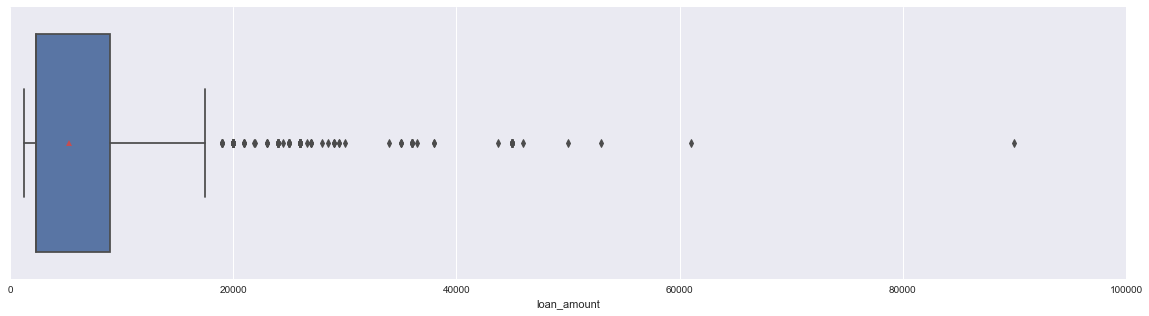

In [49]:
# distribution of the loan amount
df["loan_amount"] = df["loan_amount"].astype(float)
sns.set(rc={'figure.figsize':(20,5)})
x = sns.boxplot(x="loan_amount",  data=df, orient='h',showmeans=True ).set(xlim=(0,100000))
plt.show(x)

In [50]:
df["loan_amount"].describe()

count     4999.000000
mean      5321.103421
std       6104.342780
min       1240.000000
25%       2350.000000
50%       2350.000000
75%       9000.000000
max      90000.000000
Name: loan_amount, dtype: float64

> ### On an average the loan is for ~5k with 50% of spread between ~2k and ~9k 

In [51]:
# where loan amount was not rounded of to the nearest tens
df[df.apply(lambda x : x["loan_amount"]%10!=0, axis = 1)]

0                            village  group_id  member_id  \
130    130                        Ingalagundi    182325          2   
642    642                             Harave    212892          1   
3893  3893                         Kotthegala    213024          2   
4060  4060  Chikkakereyur Village Panchayatha    226441          8   
4113  4113                      Not Available   1025815         11   
4642  4642  Chikkakereyur Village Panchayatha    227759          2   
4841  4841                   Doddadasenahalli    556481          5   

          branch_name     circle_name  loan_amount       product_type  \
130         Hirekerur       Hirekerur      12174.0  Solar Light Selco   
642            Hunsur      KARNAKUPPE      10195.0  Solar Light Selco   
3893           Hunsur      KARNAKUPPE       7876.0  Solar Light Selco   
4060  Heggadevanakote        MADAPURA       8282.0  Solar Light Selco   
4113         Kundagol      Mishrikoti          NaN  Solar Light Selco   
4642  Heggadevanakote        MADAPURA       7655.0  Solar Light Selco   
4841     Shidlaghatta  Shidlaghatta A      10164.0  Solar Light Selco   

     name_of_model product_detail institution_name manufacturer_name  \
130         EH4HLS    4 LED Light           SKDRDP             SELCO   
642         SB2HLS          2 CFL           SKDRDP             SELCO   
3893        EH2HLS    2 LED Light           SKDRDP             SELCO   
4060        EH2HLS    2 LED Light           SKDRDP             SELCO   
4113        SH4HLS  4 COMBI Light           SKDRDP             SELCO   
4642        EH2HLS    2 LED Light           SKDRDP             SELCO   
4841        SB2HLS          2 CFL           SKDRDP             SELCO   

      loan_account_number     loan_application_date    product_installed_date  \
130                 74379 2018-01-30 18:30:00+00:00 2018-05-15 18:30:00+00:00   
642                105473 2017-11-05 18:30:00+00:00 2017-12-04 18:30:00+00:00   
3893               105419 2017-07-16 18:30:00+00:00 2017-12-03 18:30:00+00:00   
4060                71953 2017-06-25 18:30:00+00:00 2017-10-22 18:30:00+00:00   
4113                15500 2017-12-08 18:30:00+00:00 2017-12-12 18:30:00+00:00   
4642                71978 2017-06-25 18:30:00+00:00 2017-10-22 18:30:00+00:00   
4841                64978 2017-10-01 18:30:00+00:00 2018-01-07 18:30:00+00:00   

       document_signature_date    loan_id household_id  product_id  branch_id  \
130  2018-01-30 18:30:00+00:00   64-74379     182325-2        36.0       61.0   
642  2017-11-05 18:30:00+00:00  72-105473     212892-1        43.0       69.0   
3893 2017-07-16 18:30:00+00:00  72-105419     213024-2        35.0       69.0   
4060 2017-06-25 18:30:00+00:00   66-71953     226441-8        35.0       63.0   
4113 2017-12-08 18:30:00+00:00  207-15500   1025815-11        50.0      161.0   
4642 2017-06-25 18:30:00+00:00   66-71978     227759-2        35.0       63.0   
4841 2017-10-01 18:30:00+00:00  140-64978     556481-5        43.0      129.0   

      partner_id  
130            1  
642            1  
3893           1  
4060           1  
4113           1  
4642           1  
4841           1

## time columns deep dive

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
0                          5000 non-null int64
village                    5000 non-null object
group_id                   5000 non-null int64
member_id                  5000 non-null int64
branch_name                5000 non-null object
circle_name                5000 non-null object
loan_amount                4999 non-null float64
product_type               5000 non-null object
name_of_model              5000 non-null object
product_detail             1413 non-null object
institution_name           5000 non-null object
manufacturer_name          5000 non-null object
loan_account_number        5000 non-null int64
loan_application_date      5000 non-null datetime64[ns, UTC]
product_installed_date     5000 non-null datetime64[ns, UTC]
document_signature_date    5000 non-null datetime64[ns, UTC]
loan_id                    5000 non-null object
household_id               5000 non-null 

In [53]:
date = df[['loan_application_date', 'product_installed_date','document_signature_date']]
date["application_install_difference"] = df.product_installed_date - df.loan_application_date
date["difference_days"] = [i.days for i in date.application_install_difference]
date.head()

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


loan_application_date    product_installed_date  \
0 2018-06-11 18:30:00+00:00 2018-06-17 18:30:00+00:00   
1 2019-01-06 18:30:00+00:00 2019-01-09 18:30:00+00:00   
2 2018-06-01 18:30:00+00:00 2018-06-03 18:30:00+00:00   
3 2018-09-23 18:30:00+00:00 2018-09-24 18:30:00+00:00   
4 2019-03-14 18:30:00+00:00 2019-03-17 18:30:00+00:00   

    document_signature_date application_install_difference  difference_days  
0 2018-06-11 18:30:00+00:00                         6 days                6  
1 2019-01-06 18:30:00+00:00                         3 days                3  
2 2018-06-01 18:30:00+00:00                         2 days                2  
3 2018-09-23 18:30:00+00:00                         1 days                1  
4 2019-03-14 18:30:00+00:00                         3 days                3

In [54]:
date.application_install_difference.mean()

Timedelta('4 days 00:48:23.040000')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9ac42f8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9ac42ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9ac42f588>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9ac422710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9ac422dd8>],
 'means': [<matplotlib.lines.Line2D at 0x1f9ac422a90>]}

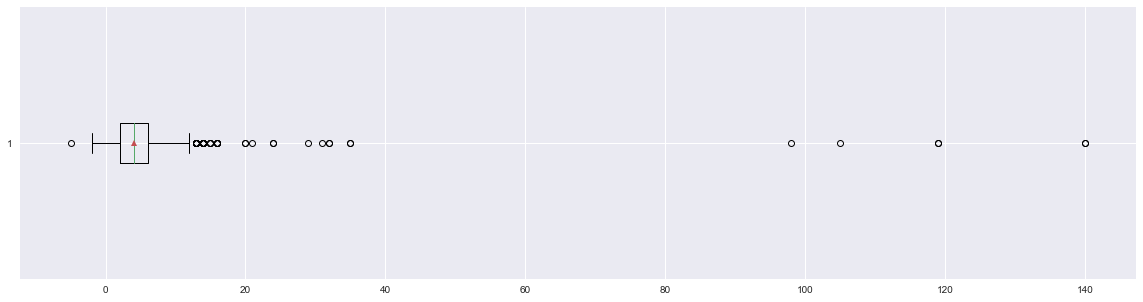

In [55]:
plt.boxplot(date.difference_days,vert=False,showmeans=True)

In [56]:
date.describe()

application_install_difference  difference_days
count                           5000      5000.000000
mean          4 days 00:48:23.040000         4.033600
std           4 days 22:32:02.852996         4.938922
min                -5 days +00:00:00        -5.000000
25%                  2 days 00:00:00         2.000000
50%                  4 days 00:00:00         4.000000
75%                  6 days 00:00:00         6.000000
max                140 days 00:00:00       140.000000

> ### On an average the difference between application and installation is ~ 4 days

In [57]:
df["village"] = df["village"].apply(lambda x: x.lower())
df["branch_name"] = df["branch_name"].apply(lambda x: x.lower())
df["circle_name"] = df["circle_name"].apply(lambda x: x.lower())
df["product_type"] = df["product_type"].apply(lambda x: x.lower())
df["name_of_model"] = df["name_of_model"].apply(lambda x: x.lower())
df["product_detail"] = df["product_detail"].apply(lambda x: x.lower() if str(x)!="nan" else "")
df["institution_name"] = df["institution_name"].apply(lambda x: x.lower())
df["manufacturer_name"] = df["manufacturer_name"].apply(lambda x: x.lower())

In [58]:
# which ones took long time
# the ones that take more time than 95th percentile
df["difference_days"] = date.difference_days
delay = df[df["difference_days"]>date.difference_days.quantile(.95)]
delay

0            village  group_id  member_id      branch_name  \
16      16  gattakamdenahalli    571333         10       bangarpete   
68      68         bannangadi    386625          3      pandavapura   
71      71          hegathuru    207261         17         arkalgud   
130    130        ingalagundi    182325          2        hirekerur   
137    137          hosahalli    405285          9        malavalli   
...    ...                ...       ...        ...              ...   
4905  4905       golthamajalu    641275         12          bantwal   
4907  4907        chandhagalu    390599          7           mandya   
4957  4957             r.pete    571382          2       bangarpete   
4970  4970       ballenahalli    381284         12  krishnarajapete   
4986  4986    basavakalyan  r   1015110          2     basavakalyan   

      circle_name  loan_amount               product_type name_of_model  \
16            kgf       2350.0  greenway jumbo stove gjs1          gjs1   
68     aralakuppe       1240.0           cook stove gssv3         gssv3   
71        konanur       2350.0  greenway jumbo stove gjs1          gjs1   
130     hirekerur      12174.0          solar light selco        eh4hls   
137    belakavadi      23000.0          solar light selco        sb6hls   
...           ...          ...                        ...           ...   
4905     kalladka       2350.0  greenway jumbo stove gjs1          gjs1   
4907       holalu       1240.0           cook stove gssv3         gssv3   
4957       r pete       1240.0           cook stove gssv3         gssv3   
4970  bhukanakere      11000.0          solar light selco        sb2hls   
4986  narayanapur       2350.0  greenway jumbo stove gjs1          gjs1   

     product_detail institution_name        manufacturer_name  \
16                            skdrdp  greenway grameena infra   
68                            skdrdp  greenway grameena infra   
71                            skdrdp  greenway grameena infra   
130     4 led light           skdrdp                    selco   
137           6 cfl           skdrdp                    selco   
...             ...              ...                      ...   
4905                          skdrdp  greenway grameena infra   
4907                          skdrdp  greenway grameena infra   
4957                          skdrdp  greenway grameena infra   
4970          2 cfl           skdrdp                    selco   
4986                          skdrdp  greenway grameena infra   

      loan_account_number     loan_application_date    product_installed_date  \
16                 112551 2017-12-31 18:30:00+00:00 2018-01-09 18:30:00+00:00   
68                 114254 2017-12-19 18:30:00+00:00 2018-01-01 18:30:00+00:00   
71                 189715 2018-11-04 18:30:00+00:00 2018-11-15 18:30:00+00:00   
130                 74379 2018-01-30 18:30:00+00:00 2018-05-15 18:30:00+00:00   
137                 82484 2017-10-13 18:30:00+00:00 2017-10-22 18:30:00+00:00   
...                   ...                       ...                       ...   
4905               735862 2019-04-14 18:30:00+00:00 2019-04-24 18:30:00+00:00   
4907               167840 2017-10-16 18:30:00+00:00 2017-10-25 18:30:00+00:00   
4957               110809 2017-12-22 18:30:00+00:00 2018-01-02 18:30:00+00:00   
4970               100093 2017-10-15 18:30:00+00:00 2017-10-26 18:30:00+00:00   
4986               100263 2019-01-08 18:30:00+00:00 2019-01-20 18:30:00+00:00   

       document_signature_date     loan_id household_id  product_id  \
16   2017-12-31 18:30:00+00:00  143-112551    571333-10        38.0   
68   2017-12-19 18:30:00+00:00  104-114254     386625-3        37.0   
71   2018-11-04 18:30:00+00:00   68-189715    207261-17        38.0   
130  2018-01-30 18:30:00+00:00    64-74379     182325-2        36.0   
137  2017-10-13 18:30:00+00:00   108-82484     405285-9        46.0   
...                        ...         ...          ...         ...   
4905

In [59]:
# top 10 villages where time between application and installation is the highest
delay.groupby('village').mean().sort_values('difference_days',ascending=False)[:10]

0  group_id  member_id  loan_amount  \
village                                                                       
kotthegala                         2602.5  212713.0        5.5       7568.0   
chikkakereyur village panchayatha  4351.0  227100.0        5.0       7968.5   
ingalagundi                         130.0  182325.0        2.0      12174.0   
doddadasenahalli                   4841.0  556481.0        5.0      10164.0   
kumbalagodu gollahalli             4044.0  591152.0        9.0       2350.0   
ikkanuru                           4513.0  320983.0        6.0       2350.0   
appenahalli                        2349.0  440172.0        8.0       2350.0   
yakatpur                           2735.0  923298.0        1.0      20000.0   
sihi neerina kola                   215.0  390445.0       11.0       2350.0   
harave                              642.0  212892.0        1.0      10195.0   

                                   loan_account_number  product_id  branch_id  \
village                                                                         
kotthegala                                    105418.0        35.0       69.0   
chikkakereyur village panchayatha              71965.5        35.0       63.0   
ingalagundi                                    74379.0        36.0       61.0   
doddadasenahalli                               64978.0        43.0      129.0   
kumbalagodu gollahalli                        638621.0        38.0      136.0   
ikkanuru                                      239311.0        38.0       76.0   
appenahalli                                   190389.0        38.0      107.0   
yakatpur                                      185245.0        44.0      143.0   
sihi neerina kola                             300795.0        38.0       97.0   
harave                                        105473.0        43.0       69.0   

                                   partner_id  difference_days  
village                                                         
kotthegala                                1.0            140.0  
chikkakereyur village panchayatha         1.0            119.0  
ingalagundi                               1.0            105.0  
doddadasenahalli                          1.0             98.0  
kumbalagodu gollahalli                    1.0             35.0  
ikkanuru                                  1.0             35.0  
appenahalli                               1.0             32.0  
yakatpur                                  1.0             32.0  
sihi neerina kola                         1.0             31.0  
harave                                    1.0             29.0

In [60]:
# top 10 branch_name where time between application and installation is the highest
delay.groupby('branch_name').mean().sort_values('difference_days',ascending=False)[:10]

0       group_id  member_id   loan_amount  \
branch_name                                                       
heggadevanakote  4351.0  227100.000000        5.0   7968.500000   
hirekerur         130.0  182325.000000        2.0  12174.000000   
hunsur           1949.0  212772.666667        4.0   8443.666667   
shidlaghatta     3964.0  556240.000000        3.0   5702.000000   
hiriyur          4513.0  320983.000000        6.0   2350.000000   
ramanagara       4044.0  591152.000000        9.0   2350.000000   
kudligi          2349.0  440172.000000        8.0   2350.000000   
bidar            2735.0  923298.000000        1.0  20000.000000   
devanahalli      2128.0  481313.000000        5.0  15750.000000   
nelamangala      1217.5  486317.500000        4.5   2350.000000   

                 loan_account_number  product_id  branch_id  partner_id  \
branch_name                                                               
heggadevanakote         71965.500000   35.000000       63.0         1.0   
hirekerur               74379.000000   36.000000       61.0         1.0   
hunsur                 105436.333333   37.666667       69.0         1.0   
shidlaghatta            64089.500000   40.000000      129.0         1.0   
hiriyur                239311.000000   38.000000       76.0         1.0   
ramanagara             638621.000000   38.000000      136.0         1.0   
kudligi                190389.000000   38.000000      107.0         1.0   
bidar                  185245.000000   44.000000      143.0         1.0   
devanahalli            101954.000000   44.000000      115.0         1.0   
nelamangala            110808.000000   38.000000      116.0         1.0   

                 difference_days  
branch_name                       
heggadevanakote            119.0  
hirekerur                  105.0  
hunsur                     103.0  
shidlaghatta                54.0  
hiriyur                     35.0  
ramanagara                  35.0  
kudligi                     32.0  
bidar                       32.0  
devanahalli                 24.0  
nelamangala                 17.0

In [61]:
# top 10 circle_name where time between application and installation is the highest
delay.groupby('circle_name').mean().sort_values('difference_days',ascending=False)[:10]

0       group_id  member_id   loan_amount  \
circle_name                                                      
madapura        4351.0  227100.000000        5.0   7968.500000   
hirekerur        130.0  182325.000000        2.0  12174.000000   
karnakuppe      1949.0  212772.666667        4.0   8443.666667   
shidlaghatta a  4841.0  556481.000000        5.0  10164.000000   
hariyabbe       4513.0  320983.000000        6.0   2350.000000   
kumbalagodu     4044.0  591152.000000        9.0   2350.000000   
manhalli        2735.0  923298.000000        1.0  20000.000000   
gudekote        2349.0  440172.000000        8.0   2350.000000   
induvalu         215.0  390445.000000       11.0   2350.000000   
nallur          2128.0  481313.000000        5.0  15750.000000   

                loan_account_number  product_id  branch_id  partner_id  \
circle_name                                                              
madapura               71965.500000   35.000000       63.0         1.0   
hirekerur              74379.000000   36.000000       61.0         1.0   
karnakuppe            105436.333333   37.666667       69.0         1.0   
shidlaghatta a         64978.000000   43.000000      129.0         1.0   
hariyabbe             239311.000000   38.000000       76.0         1.0   
kumbalagodu           638621.000000   38.000000      136.0         1.0   
manhalli              185245.000000   44.000000      143.0         1.0   
gudekote              190389.000000   38.000000      107.0         1.0   
induvalu              300795.000000   38.000000       97.0         1.0   
nallur                101954.000000   44.000000      115.0         1.0   

                difference_days  
circle_name                      
madapura                  119.0  
hirekerur                 105.0  
karnakuppe                103.0  
shidlaghatta a             98.0  
hariyabbe                  35.0  
kumbalagodu                35.0  
manhalli                   32.0  
gudekote                   32.0  
induvalu                   31.0  
nallur                     24.0

In [62]:
# mean delay based on product type
delay.groupby('product_type').mean().sort_values('difference_days',ascending=False)

0       group_id  member_id  \
product_type                                                       
solar light selco          2597.317460  516677.984127   5.666667   
greenway jumbo stove gjs1  2673.058824  623031.985294   5.397059   
cook stove gssv3           2357.869565  403075.630435   6.021739   

                            loan_amount  loan_account_number  product_id  \
product_type                                                               
solar light selco          15491.365079        261162.555556   41.047619   
greenway jumbo stove gjs1   2351.911765        176694.044118   38.000000   
cook stove gssv3            1240.000000        110291.065217   37.000000   

                            branch_id  partner_id  difference_days  
product_type                                                        
solar light selco          103.111111         1.0        22.063492  
greenway jumbo stove gjs1  142.058824         1.0        12.500000  
cook stove gssv3           102.521739         1.0        10.717391

In [63]:
# name_of_model with mean delay distribution
delay.groupby('name_of_model').mean().sort_values('difference_days',ascending=False)

0       group_id  member_id   loan_amount  \
name_of_model                                                        
eh2hls         3324.600000  345679.000000   6.100000   8457.300000   
sb4hls         2701.750000  736453.250000   3.750000  18012.500000   
eh4hls         2576.250000  564280.750000   6.500000  13122.833333   
sb2hls         2592.052632  459560.789474   5.000000  10303.105263   
bh4hls          895.000000  664926.000000  13.000000  21000.000000   
sb9hls         4109.000000  298146.000000   2.000000  28500.000000   
gjs1           2673.058824  623031.985294   5.397059   2351.911765   
gssv3          2357.869565  403075.630435   6.021739   1240.000000   
s14hls         3257.250000  649808.750000   6.750000  45000.000000   
sh4hls         1933.222222  604969.111111   5.666667  15455.555556   
s10hls         1922.500000  616386.000000   3.000000  37250.000000   
sb6hls          137.000000  405285.000000   9.000000  23000.000000   

               loan_account_number  product_id   branch_id  partner_id  \
name_of_model                                                            
eh2hls               158959.600000        35.0  315.300000         1.0   
sb4hls               239668.500000        44.0  101.000000         1.0   
eh4hls               275633.000000        36.0   59.000000         1.0   
sb2hls               158428.000000        43.0   91.736842         1.0   
bh4hls               711682.000000        23.0    3.000000         1.0   
sb9hls                85868.000000        48.0   82.000000         1.0   
gjs1                 176694.044118        38.0  142.058824         1.0   
gssv3                110291.065217        37.0  102.521739         1.0   
s14hls               422697.250000        41.0    5.500000         1.0   
sh4hls               449585.888889        50.0   30.444444         1.0   
s10hls               485073.500000        40.0    3.500000         1.0   
sb6hls                82484.000000        46.0  100.000000         1.0   

               difference_days  
name_of_model                   
eh2hls               58.400000  
sb4hls               20.000000  
eh4hls               17.750000  
sb2hls               17.315789  
bh4hls               13.000000  
sb9hls               13.000000  
gjs1                 12.500000  
gssv3                10.717391  
s14hls               10.000000  
sh4hls               10.000000  
s10hls                9.500000  
sb6hls                9.000000

In [64]:
# manufacturer_name with mean delay distribution
delay.groupby('manufacturer_name').mean().sort_values('difference_days',ascending=False)

0       group_id  member_id   loan_amount  \
manufacturer_name                                                              
selco                    2597.317460  516677.984127   5.666667  15491.365079   
greenway grameena infra  2545.877193  534277.666667   5.649123   1903.245614   

                         loan_account_number  product_id   branch_id  \
manufacturer_name                                                      
selco                          261162.555556   41.047619  103.111111   
greenway grameena infra        149899.859649   37.596491  126.105263   

                         partner_id  difference_days  
manufacturer_name                                     
selco                           1.0        22.063492  
greenway grameena infra         1.0        11.780702

In [65]:
# product_id with mean delay distribution
delay.groupby('product_id').mean().sort_values('difference_days',ascending=False)

0       group_id  member_id   loan_amount  \
product_id                                                        
35.0        3324.600000  345679.000000   6.100000   8457.300000   
44.0        2701.750000  736453.250000   3.750000  18012.500000   
36.0        2576.250000  564280.750000   6.500000  13122.833333   
43.0        2592.052632  459560.789474   5.000000  10303.105263   
23.0         895.000000  664926.000000  13.000000  21000.000000   
48.0        4109.000000  298146.000000   2.000000  28500.000000   
38.0        2673.058824  623031.985294   5.397059   2351.911765   
37.0        2357.869565  403075.630435   6.021739   1240.000000   
41.0        3257.250000  649808.750000   6.750000  45000.000000   
50.0        1933.222222  604969.111111   5.666667  15455.555556   
40.0        1922.500000  616386.000000   3.000000  37250.000000   
46.0         137.000000  405285.000000   9.000000  23000.000000   

            loan_account_number   branch_id  partner_id  difference_days  
product_id                                                                
35.0              158959.600000  315.300000         1.0        58.400000  
44.0              239668.500000  101.000000         1.0        20.000000  
36.0              275633.000000   59.000000         1.0        17.750000  
43.0              158428.000000   91.736842         1.0        17.315789  
23.0              711682.000000    3.000000         1.0        13.000000  
48.0               85868.000000   82.000000         1.0        13.000000  
38.0              176694.044118  142.058824         1.0        12.500000  
37.0              110291.065217  102.521739         1.0        10.717391  
41.0              422697.250000    5.500000         1.0        10.000000  
50.0              449585.888889   30.444444         1.0        10.000000  
40.0              485073.500000    3.500000         1.0         9.500000  
46.0               82484.000000  100.000000         1.0         9.000000

### trend in products bought

In [102]:
# removing columns thats not required, due to its derived property, creating new columns for analysis
trend_prod  = df[['village', 'group_id', 'member_id', 'circle_name',"branch_name",'loan_amount', 'product_type', 'name_of_model', 'manufacturer_name', 'loan_account_number','loan_application_date', 'product_installed_date','document_signature_date', 'loan_id', 'product_id','branch_id', 'difference_days']]
trend_prod["month_installed"] = [i.month for i in trend_prod.product_installed_date]
trend_prod["month_applied"] = [i.month for i in trend_prod.document_signature_date]
trend_prod

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


village  group_id  member_id   circle_name  \
0                            honnavalli     27674          1      j.c pura   
1                         amaramudnooru    650604         15       bellare   
2                             purasabhe    376321          6     purasabhe   
3                            mekalmardi     60589          4       nesargi   
4                                bijkal    287722          2      kushtagi   
...                                 ...       ...        ...           ...   
4995                           horanadu    862449          8        kalasa   
4996  w/o krishna,omkara, shg,kodibettu    673359          1       manipal   
4997                 uralichikkanahalli    477383          6  hesarughatta   
4998                           keregodu    390436          4      keregodu   
4999                         maniknagar    916894          4     humanabad   

         branch_name  loan_amount               product_type name_of_model  \
0             tiptur      15500.0          solar light selco        sh4hls   
1             sullia      53000.0          solar light selco        s15hls   
2     holenarasipura       9000.0          solar light selco        eh2hls   
3        bailahongal       8000.0          solar light selco        eh2hls   
4           kushtagi      36000.0          solar light selco        s10hls   
...              ...          ...                        ...           ...   
4995       moodigere       2350.0  greenway jumbo stove gjs1          gjs1   
4996           udupi      26000.0          solar light selco        sb8hls   
4997   doddaballapur       2350.0  greenway jumbo stove gjs1          gjs1   
4998          mandya       2350.0  greenway jumbo stove gjs1          gjs1   
4999        homnabad       2350.0  greenway jumbo stove gjs1          gjs1   

            manufacturer_name  loan_account_number     loan_application_date  \
0                       selco                99155 2018-06-11 18:30:00+00:00   
1                       selco               369065 2019-01-06 18:30:00+00:00   
2                       selco               169976 2018-06-01 18:30:00+00:00   
3                       selco               137608 2018-09-23 18:30:00+00:00   
4                       selco               114405 2019-03-14 18:30:00+00:00   
...                       ...                  ...                       ...   
4995  greenway grameena infra               296670 2019-03-04 18:30:00+00:00   
4996                    selco               766414 2018-09-21 18:30:00+00:00   
4997  greenway grameena infra               125876 2018-01-22 18:30:00+00:00   
4998  greenway grameena infra               308527 2019-03-08 18:30:00+00:00   
4999  greenway grameena infra               165467 2019-01-06 18:30:00+00:00   

        product_installed_date   document_signature_date     loan_id  \
0    2018-06-17 18:30:00+00:00 2018-06-11 18:30:00+00:00    57-99155   
1    2019-01-09 18:30:00+00:00 2019-01-06 18:30:00+00:00    4-369065   
2    2018-06-03 18:30:00+00:00 2018-06-01 18:30:00+00:00  102-169976   
3    2018-09-24 18:30:00+00:00 2018-09-23 18:30:00+00:00   50-137608   
4    2019-03-17 18:30:00+00:00 2019-03-14 18:30:00+00:00   83-114405   
...                        ...                       ...         ...   
4995 2019-03-05 18:30:00+00:00 2019-03-04 18:30:00+00:00    6-296670   
4996 2018-09-24 18:30:00+00:00 2018-09-21 18:30:00+00:00   11-766414   
4997 2018-01-23 18:30:00+00:00 2018-01-22 18:30:00+00:00  122-125876   
4998 2019-03-11 18:30:00+00:00 2019-03-08 18:30:00+00:00  105-308527   
4999 2019-01-10 18:30:00+00:00 2019-01-06 18:30:00+00:00  154-165467   

      product_id  branch_id  difference_days  month_installed  month_applied  
0           50.0       55.0                6                6              6  
1           42.0        4.0                3                1              1  
2           35.0       94.0                2                6              6  
3           35.0

In [67]:
trend_prod[trend_prod["difference_days"]<0]

village  group_id  member_id circle_name  loan_amount  \
475        bilgi    510923         14       bilgi       2350.0   
1600    kemmannu    670302          3       malpe      15500.0   
3296    thandaga     20679          1    thandaga       1240.0   
3332  kalyianpur    670902         12       malpe       2350.0   

                   product_type name_of_model        manufacturer_name  \
475   greenway jumbo stove gjs1          gjs1  greenway grameena infra   
1600          solar light selco        sh4hls                    selco   
3296           cook stove gssv3         gssv3  greenway grameena infra   
3332  greenway jumbo stove gjs1          gjs1  greenway grameena infra   

      loan_account_number     loan_application_date    product_installed_date  \
475                 77894 2018-09-04 18:30:00+00:00 2018-09-02 18:30:00+00:00   
1600               802652 2018-11-26 18:30:00+00:00 2018-11-21 18:30:00+00:00   
3296                66824 2017-10-11 18:30:00+00:00 2017-10-10 18:30:00+00:00   
3332               844633 2019-04-18 18:30:00+00:00 2019-04-17 18:30:00+00:00   

       document_signature_date    loan_id  product_id  branch_id  \
475  2018-09-04 18:30:00+00:00  129-77894        38.0      120.0   
1600 2018-11-26 18:30:00+00:00  11-802652        50.0       11.0   
3296 2017-10-11 18:30:00+00:00   58-66824        37.0       56.0   
3332 2019-04-18 18:30:00+00:00  11-844633        38.0       11.0   

      difference_days  month_installed  month_applied  
475                -2                9              9  
1600               -5               11             11  
3296               -1               10             10  
3332               -1                4              4

> ### Installation was before loan and signing for these 4 cases, which is incorrect
> ### for these cases, switching installation date with signed document assuming data entry error 

In [68]:
# trend_prod[trend_prod["difference_days"]<0]["product_installed_date"] = trend_prod[trend_prod["difference_days"]<0]["loan_application_date"]- timedelta(days=trend_prod["difference_days"].median())
trend_prod["difference_days"] = trend_prod["difference_days"].apply(lambda x: abs(x))
trend_prod[trend_prod["difference_days"]<0]

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Empty DataFrame
Columns: [village, group_id, member_id, circle_name, loan_amount, product_type, name_of_model, manufacturer_name, loan_account_number, loan_application_date, product_installed_date, document_signature_date, loan_id, product_id, branch_id, difference_days, month_installed, month_applied]
Index: []

In [69]:
pd.set_option('display.max_rows', 130)
model_installed = trend_prod.groupby(['name_of_model',"month_installed"],as_index=False).count()
model_installed

name_of_model  month_installed  village  group_id  member_id  circle_name  \
0          bh4hls                1        2         2          2            2   
1          bh4hls                5        1         1          1            1   
2          bh4hls               10        2         2          2            2   
3          eh2hls                1       32        32         32           32   
4          eh2hls                2       28        28         28           28   
5          eh2hls                3       36        36         36           36   
6          eh2hls                4        9         9          9            9   
7          eh2hls                5        4         4          4            4   
8          eh2hls                6       29        29         29           29   
9          eh2hls                7       58        58         58           58   
10         eh2hls                9       74        74         74           74   
11         eh2hls               10       26        26         26           26   
12         eh2hls               11       40        40         40           40   
13         eh2hls               12       21        21         21           21   
14         eh4hls                1       45        45         45           45   
15         eh4hls                2       22        22         22           22   
16         eh4hls                3       40        40         40           40   
17         eh4hls                4        7         7          7            7   
18         eh4hls                5        4         4          4            4   
19         eh4hls                6       15        15         15           15   
20         eh4hls                7       33        33         33           33   
21         eh4hls                9       51        51         51           51   
22         eh4hls               10       31        31         31           31   
23         eh4hls               11       22        22         22           22   
24         eh4hls               12       19        19         19           19   
25           gjs1                1      535       535        535          535   
26           gjs1                2       59        59         59           59   
27           gjs1                3      703       703        703          703   
28           gjs1                4       95        95         95           95   
29           gjs1                5       23        23         23           23   
30           gjs1                6      114       114        114          114   
31           gjs1                7      244       244        244          244   
32           gjs1                9      718       718        718          718   
33           gjs1               10       85        85         85           85   
34           gjs1               11      524       524        524          524   
35           gjs1               12       51        51         51           51   
36          gssv3                1       98        98         98           98   
37          gssv3                2       64        64         64           64   
38          gssv3                5        9         9          9            9   
39          gssv3                6       15        15         15           15   
40          gssv3                7        3         3          3            3   
41          gssv3                9        2         2          2            2   
42          gssv3               10      140       140        140          140   
43          gssv3               11        4         4          4            4   
44          gssv3               12      101       101        101          101   
45         s10hls                1        3         3          3            3   
46         s10hls                2        1         1          1            1   
47         s10hls                3        2         2          2            2   
48         s10hls                6 

### month wise installation of products

Month wise trend of 'bh4hls' getting installed


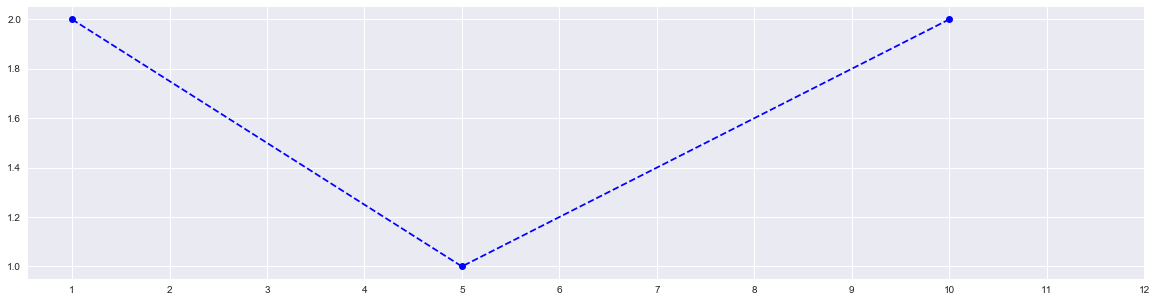

Month wise trend of 'eh2hls' getting installed


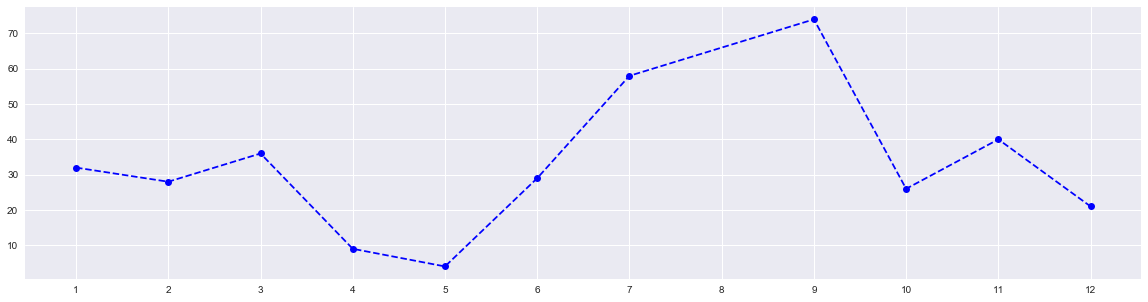

Month wise trend of 'eh4hls' getting installed


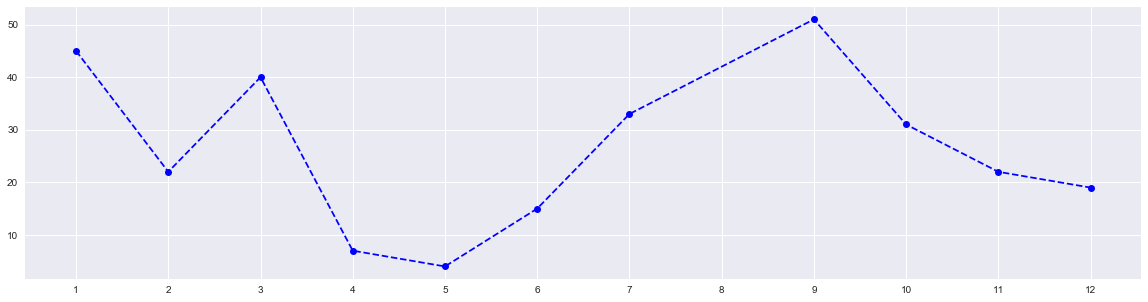

Month wise trend of 'gjs1' getting installed


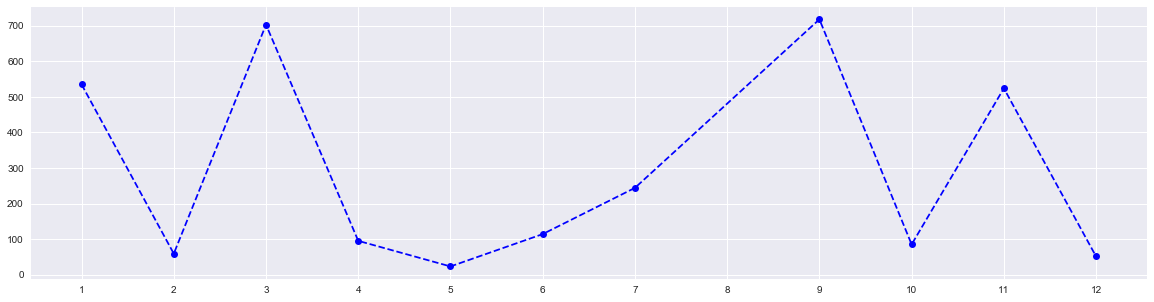

Month wise trend of 'gssv3' getting installed


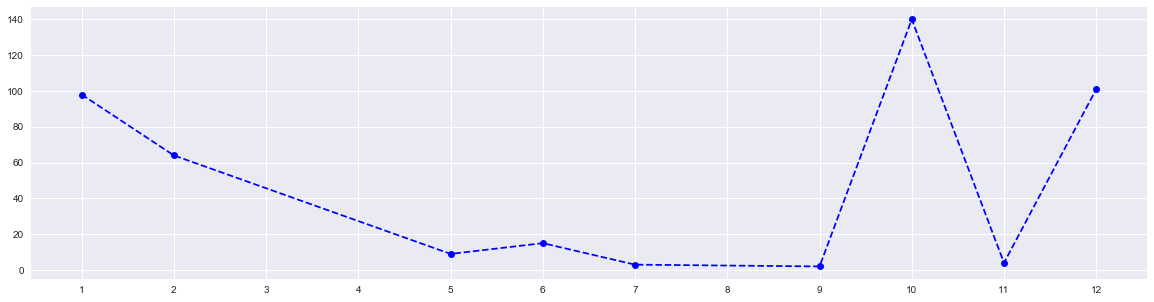

Month wise trend of 's10hls' getting installed


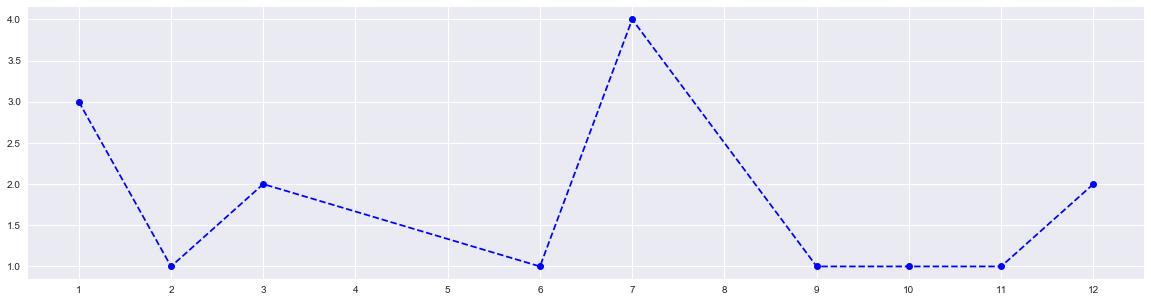

Month wise trend of 's14hls' getting installed


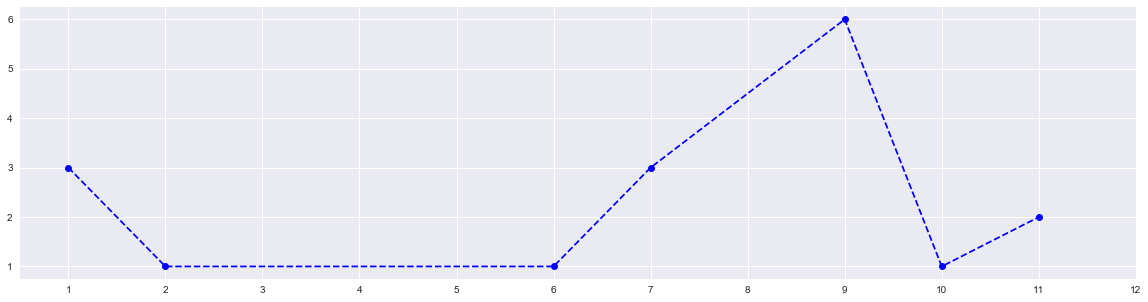

Month wise trend of 's15hls' getting installed


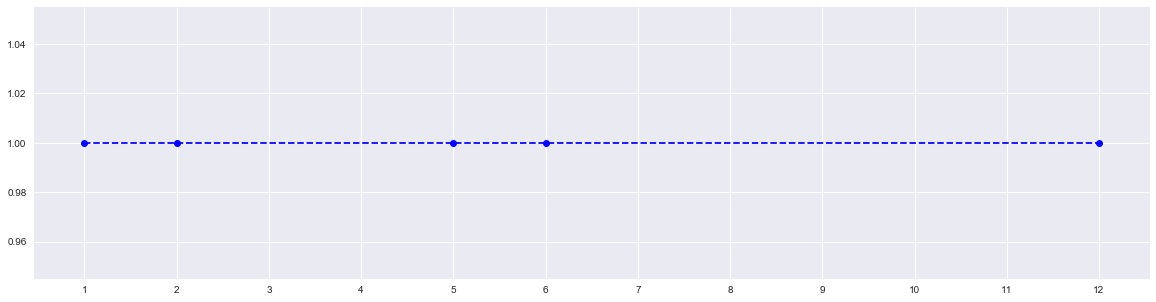

Month wise trend of 'sb2hls' getting installed


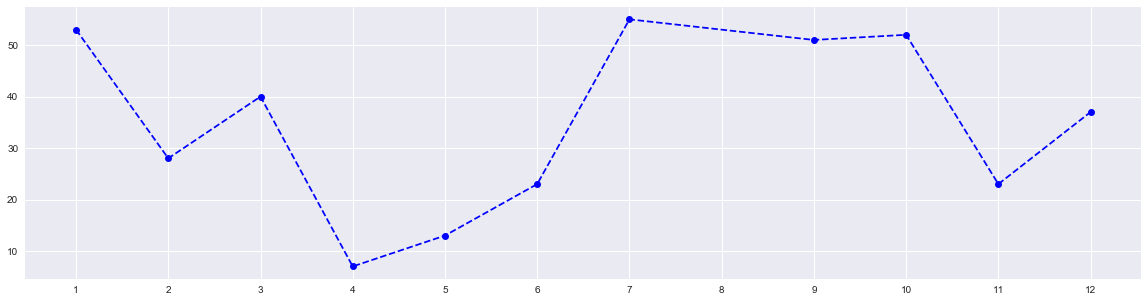

Month wise trend of 'sb4hls' getting installed


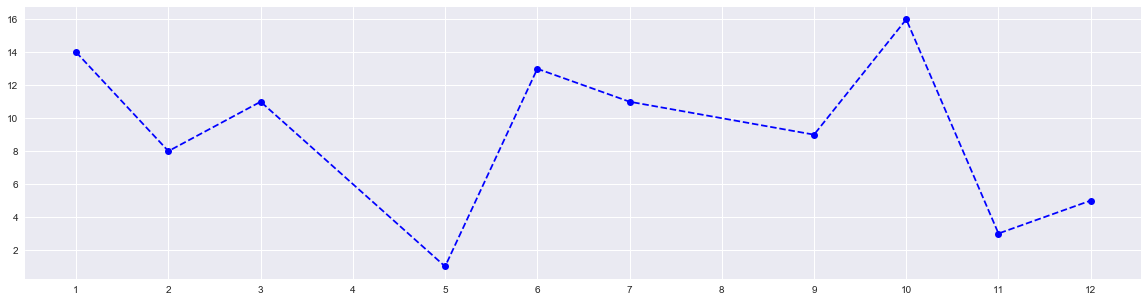

Month wise trend of 'sb6hls' getting installed


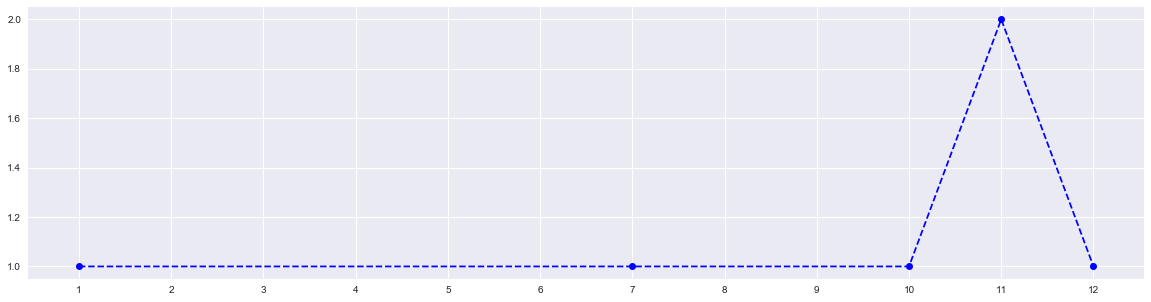

Month wise trend of 'sb8hls' getting installed


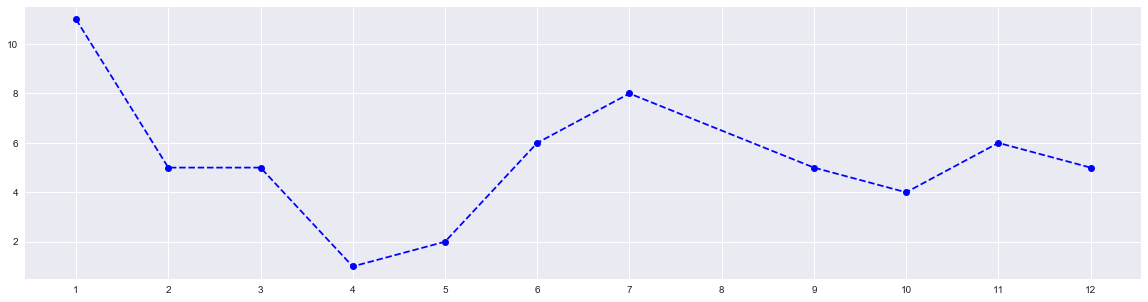

Month wise trend of 'sb9hls' getting installed


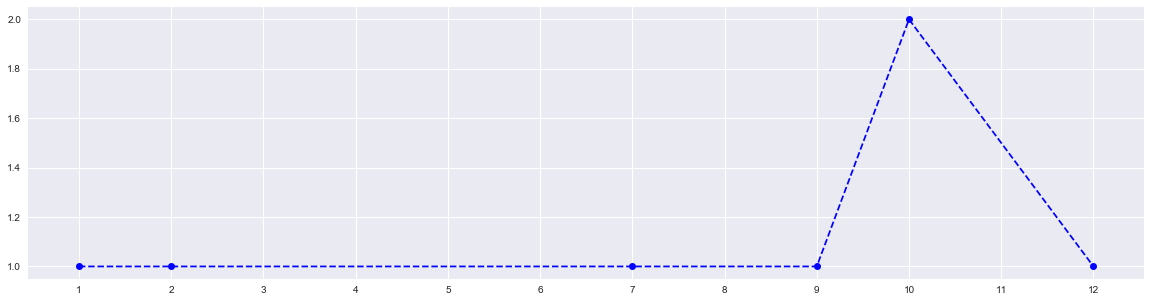

Month wise trend of 'sh4hls' getting installed


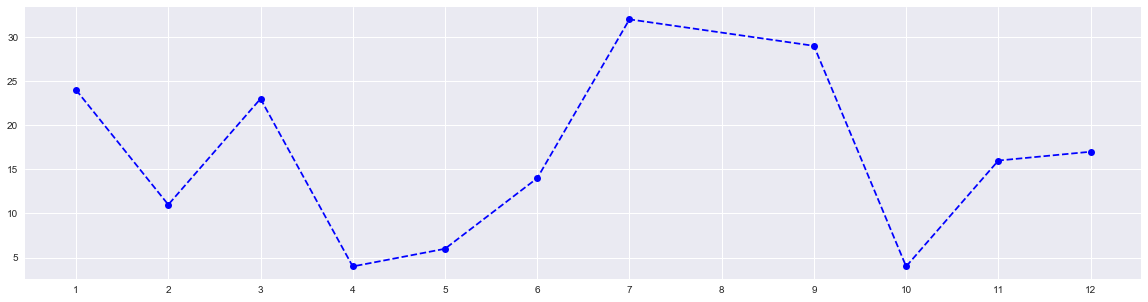

In [70]:
for i in model_installed.name_of_model.unique():
    x = model_installed[model_installed["name_of_model"].str.contains(i)]
    print("Month wise trend of '{}' getting installed".format(i))
    plt.plot(x.month_installed,x.village, '--bo')
    plt.xticks(range(1,13))
    plt.show()

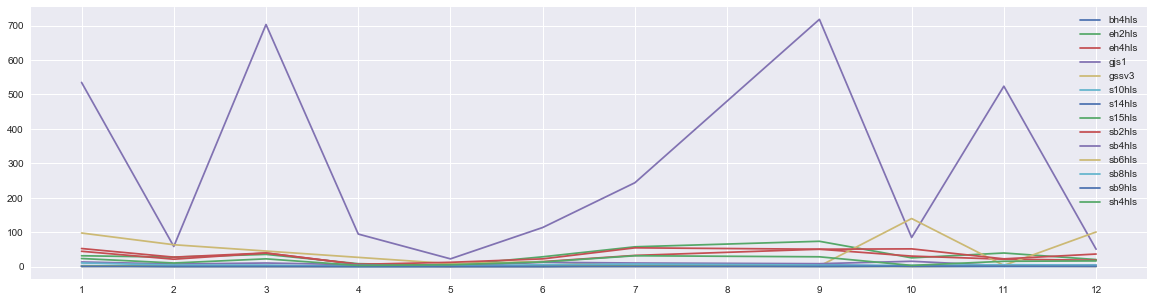

In [71]:
# all in one for comparision
l = []
for i in model_installed.name_of_model.unique():
    x = model_installed[model_installed["name_of_model"].str.contains(i)]
    plt.plot(x.month_installed,x.village)
    plt.xticks(range(1,13))
    l.append(i)
plt.legend(l)
plt.show()

> ### Apart from these bh4hls, s15hls, sb6hls, and sb9hls all are in demand through out the
> ### April and May always have the least products installed
> ### September and October sees increase in demand for installation

In [72]:
pd.set_option('display.max_rows', 100)
village_month = trend_prod.groupby(['village',"month_installed"],as_index=False).count()
village_month#.sort_values('group_id',ascending = False)

village  month_installed  group_id  member_id  \
0                      13ne ward                9         2          2   
1     151/2 vasarakudrige ankola                9         1          1   
2                        23 ward                1         4          4   
3                        23 ward                3         2          2   
4                2nd nagarthpete               10         1          1   
...                          ...              ...       ...        ...   
3470                    yelburga                6         1          1   
3471                 yelimunnoli                9         3          3   
3472                 yelimunnoli               11         1          1   
3473                     yenkura               11         1          1   
3474                   yerlapady                7         2          2   

      circle_name  loan_amount  product_type  name_of_model  \
0               2            2             2              2   
1               1            1             1              1   
2               4            4             4              4   
3               2            2             2              2   
4               1            1             1              1   
...           ...          ...           ...            ...   
3470            1            1             1              1   
3471            3            3             3              3   
3472            1            1             1              1   
3473            1            1             1              1   
3474            2            2             2              2   

      manufacturer_name  loan_account_number  loan_application_date  \
0                     2                    2                      2   
1                     1                    1                      1   
2                     4                    4                      4   
3                     2                    2                      2   
4                     1                    1                      1   
...                 ...                  ...                    ...   
3470                  1                    1                      1   
3471                  3                    3                      3   
3472                  1                    1                      1   
3473                  1                    1                      1   
3474                  2                    2                      2   

      product_installed_date  document_signature_date  loan_id  product_id  \
0                          2                        2        2           2   
1                          1                        1        1           1   
2                          4                        4        4           4   
3                          2                        2        2           2   
4                          1                        1        1           1   
...                      ...                      ...      ...         ...   
3470                       1                        1        1           1   
3471                       3                        3        3           3   
3472                       1                        1        1           1   
3473                       1                        1        1           1   
3474                       2                        2        2           2   

      branch_id  difference_days  month_applied  
0             2                2              2  
1             1                1              1  
2             4                4              4  
3             2                2              2  
4             1                1              1  
...         ...              ...            ...  
3470          1                1              1  
3471          3                3              3  
3472          1                1              1  
3473          1                1              1  
3474          2                2       

### village wise installation of products

Village wise trend of 'adagur' getting installed 


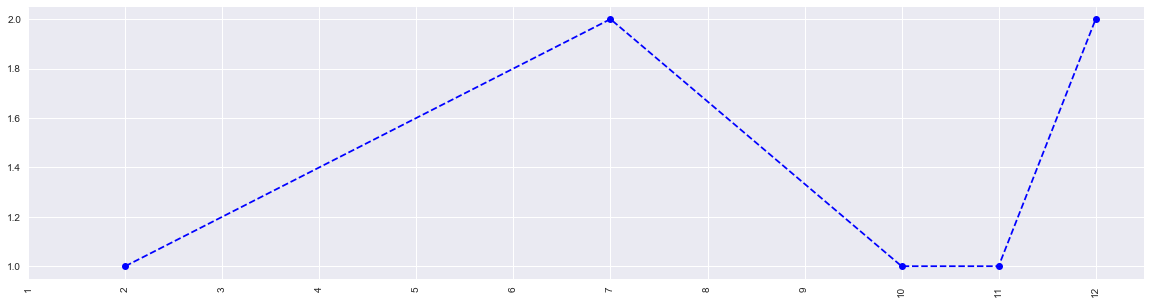

Village wise trend of 'bendekere' getting installed 


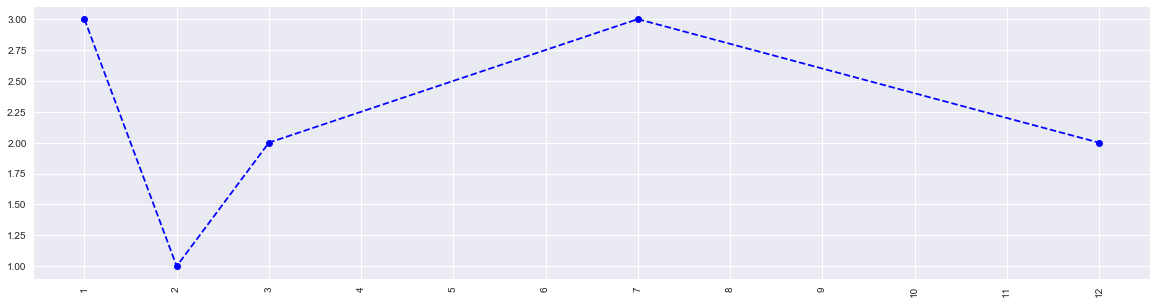

Village wise trend of 'bettahalasuru' getting installed 


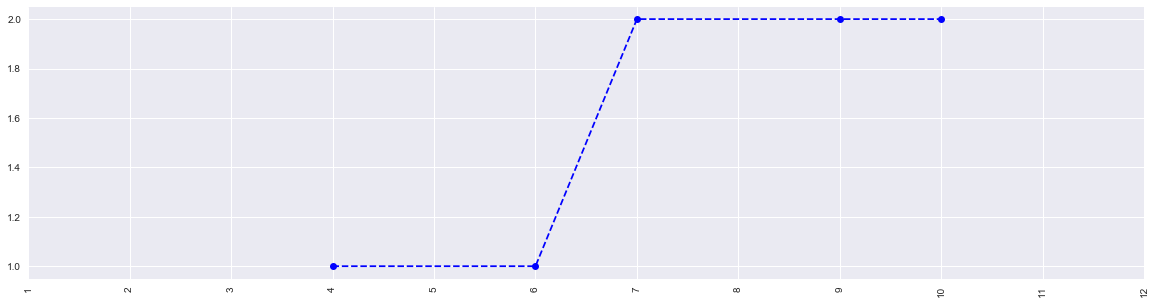

Village wise trend of 'chikkahalli' getting installed 


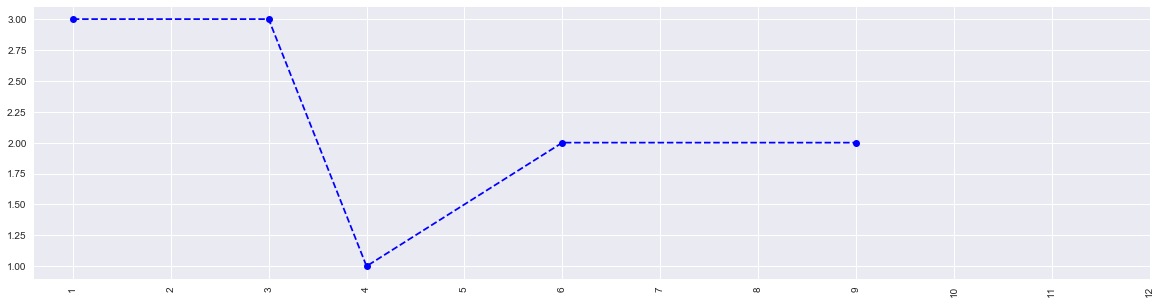

Village wise trend of 'hirehalli village panchayatha' getting installed 


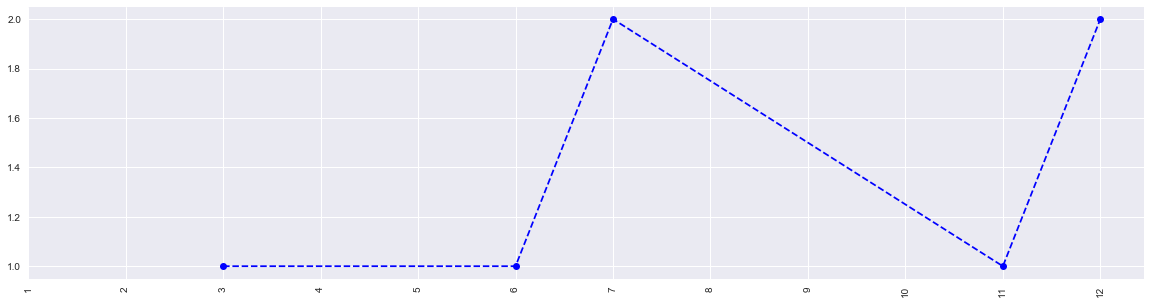

Village wise trend of 'hiriyur' getting installed 


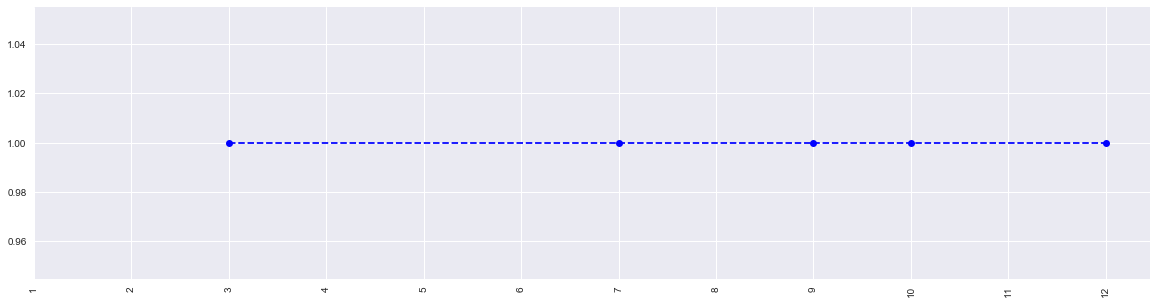

Village wise trend of 'honnavara' getting installed 


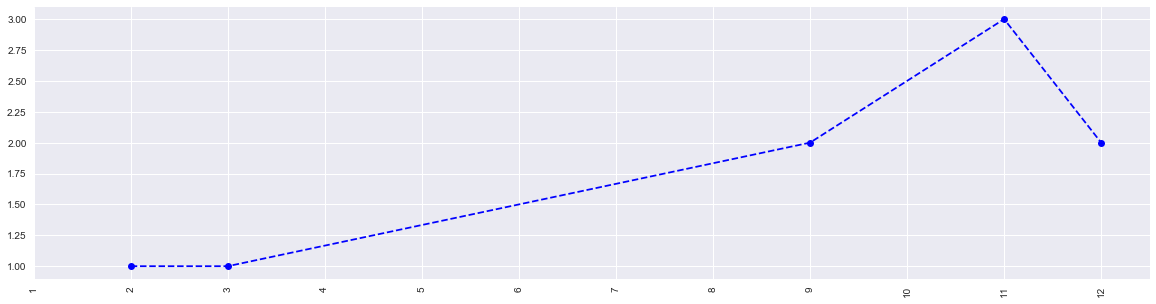

Village wise trend of 'hospete' getting installed 


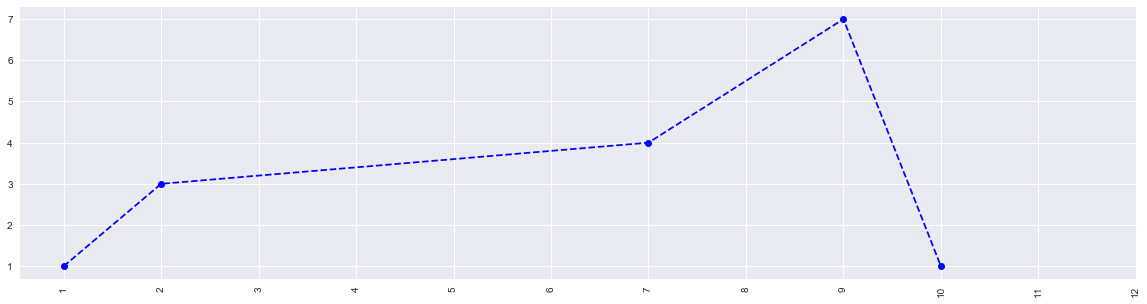

Village wise trend of 'hosur' getting installed 


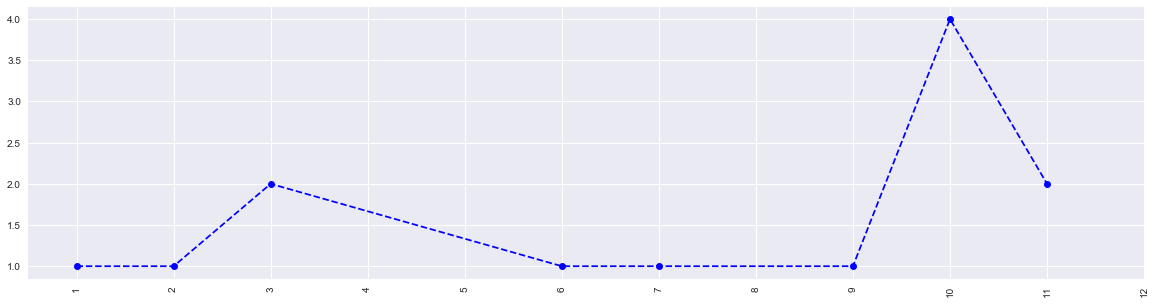

Village wise trend of 'huliyaru' getting installed 


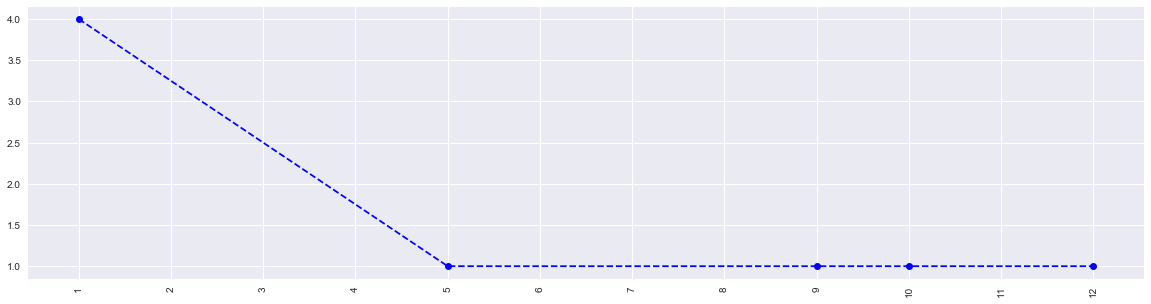

Village wise trend of 'kasaba' getting installed 


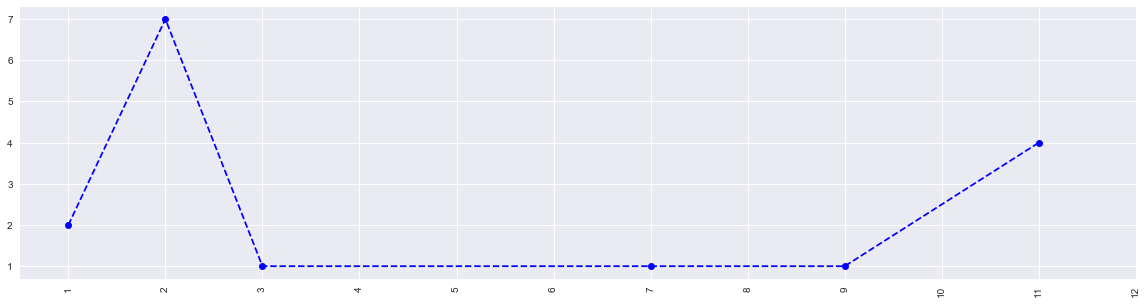

Village wise trend of 'kodiyala' getting installed 


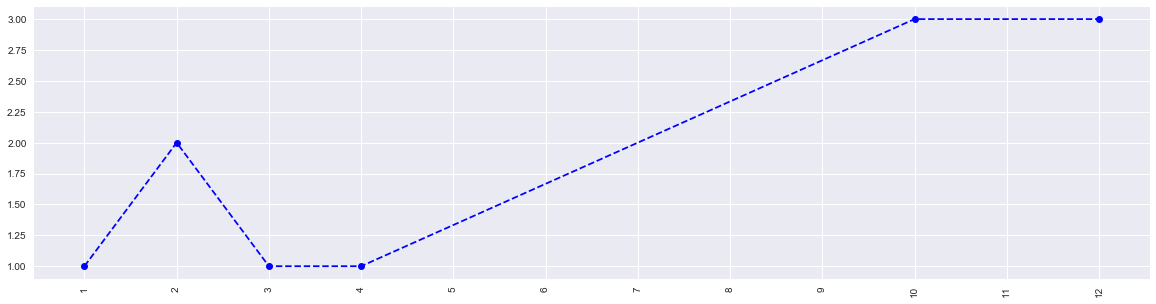

Village wise trend of 'nelamangala' getting installed 


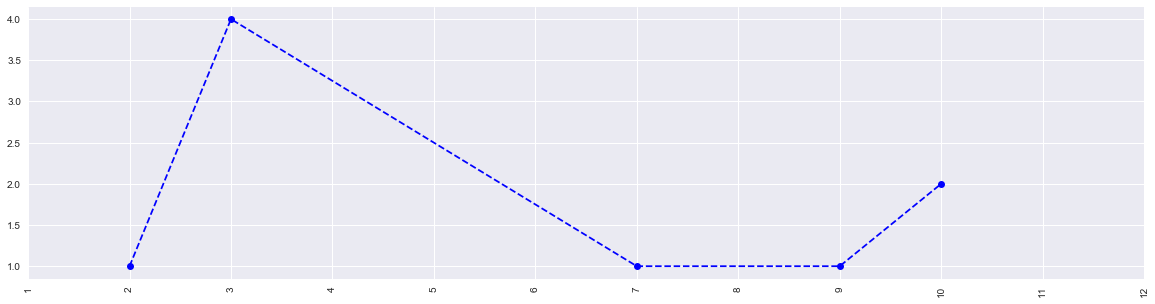

Village wise trend of 'old hubli' getting installed 


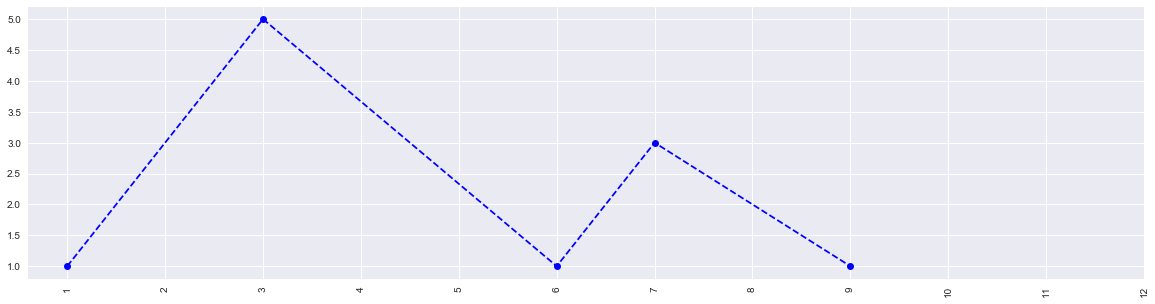

Village wise trend of 'rampura' getting installed 


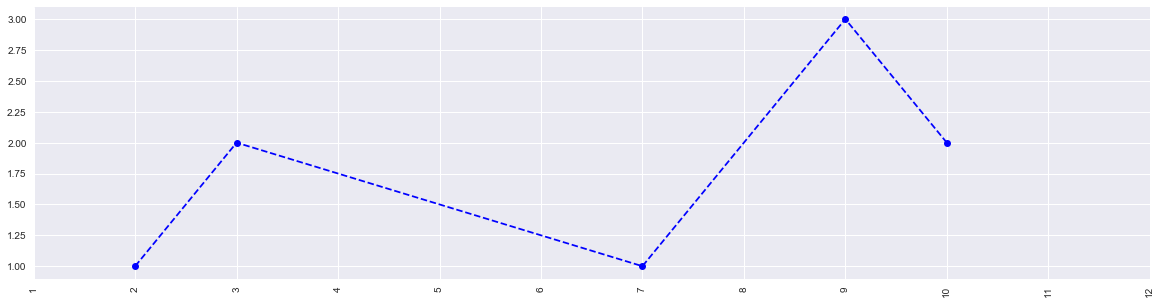

Village wise trend of 'rangapura' getting installed 


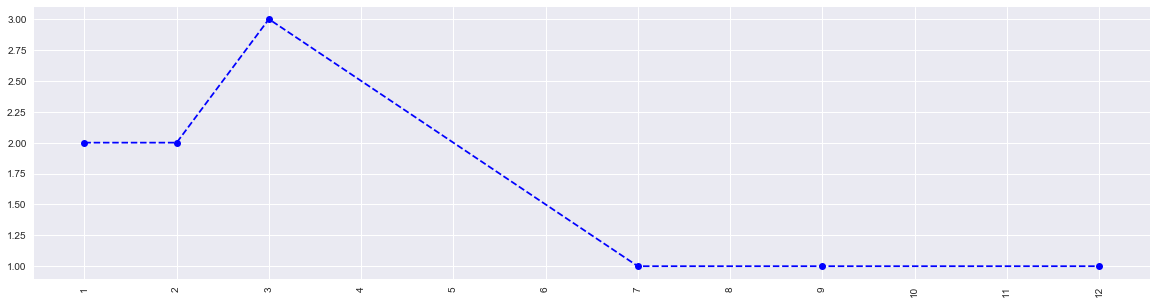

Village wise trend of 'shidlaghatta rural' getting installed 


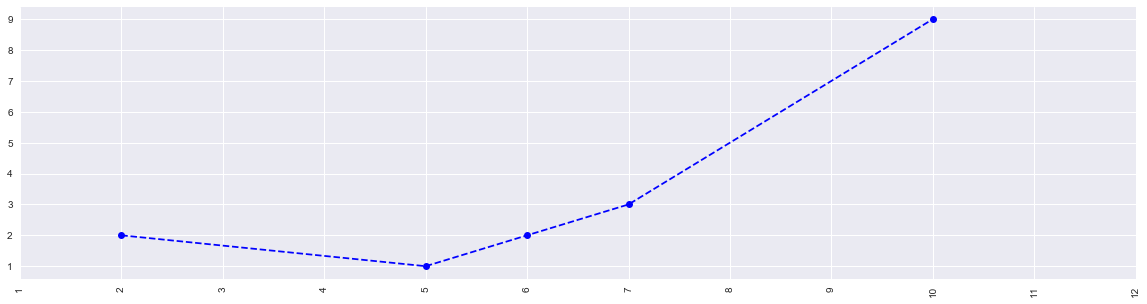

Village wise trend of 'soravanahalli' getting installed 


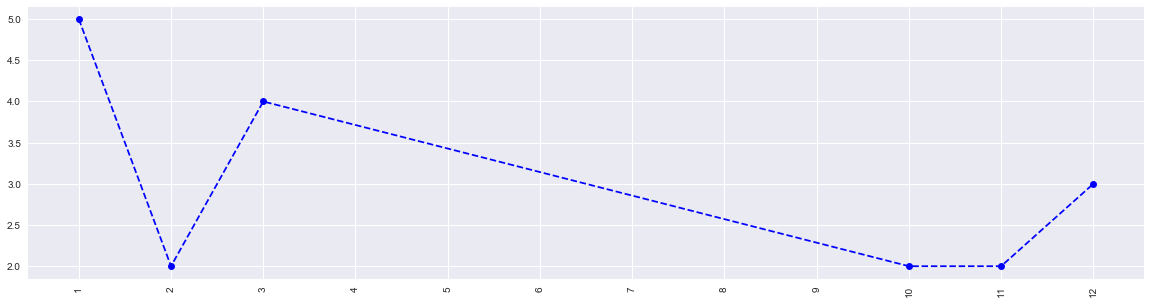

Village wise trend of 'thandaga' getting installed 


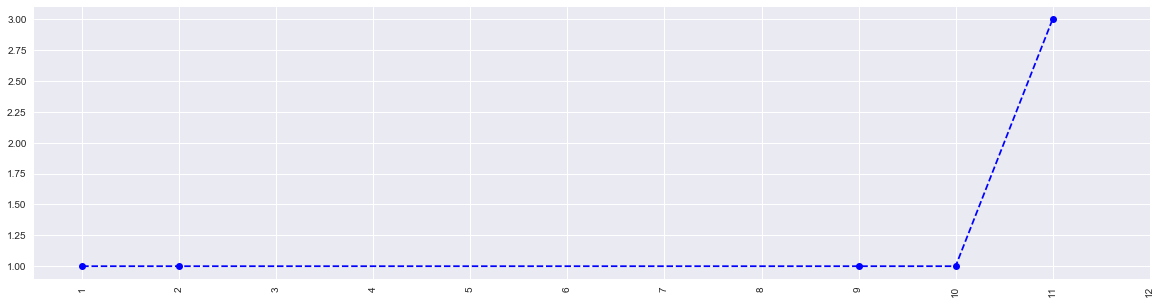

In [73]:
# only for the villages with more than 4 months of installation
for i in village_month.village.unique():
    x = village_month[village_month["village"]==i]
    if(x.shape[0]>4):
        print("Village wise trend of '{}' getting installed ".format(i))
        plt.plot(x.month_installed,x.group_id, '--bo')
        plt.xticks(range(1,13),rotation=90)
        plt.show()

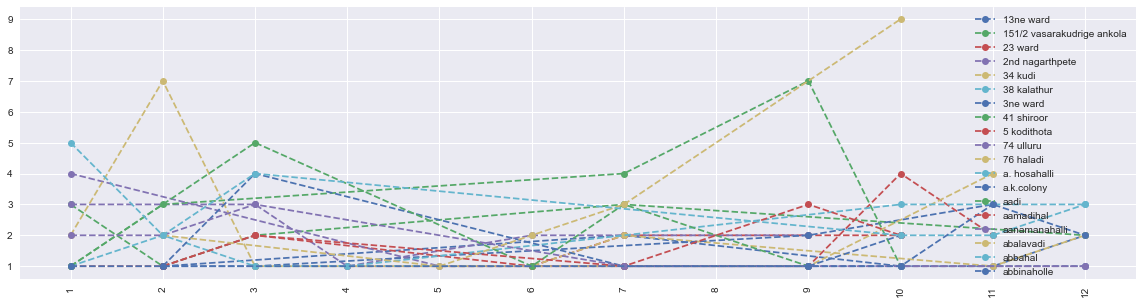

In [74]:
# only for the villages with more than 4 months of installation
l = []
for i in village_month.village.unique():
    x = village_month[village_month["village"]==i]
    if(x.shape[0]>4):
        plt.plot(x.month_installed,x.group_id, '--o')
    plt.xticks(range(1,13),rotation=90)
    l.append(i)
    plt.legend(l)
plt.show()

> ### Maximum installation in any given month is 9

### Village and loans

In [119]:
village_applied = trend_prod.groupby(['village'],as_index=False).sum().sort_values("loan_amount",ascending=False)
village_applied

village  group_id  member_id  loan_amount  loan_account_number  \
2141         sirigere   5550879         92     140150.0              4354691   
2163    soravanahalli    391529        101     119670.0              1986346   
342         bendekere   4028676         50     106100.0              1777856   
1962  s.m krishnagara   2046262          2      99000.0               530310   
1832          nippani   1141989         59      95400.0              2340463   
...               ...       ...        ...          ...                  ...   
746      gummanakolli    870323          1       1240.0               388633   
1255          kennalu    386289          3       1240.0               115456   
74         amachavadi    241691         11       1240.0               236057   
1534          malangi    220237          1       1240.0                97693   
829           hankere    390712          1       1240.0               167709   

      product_id  branch_id  difference_days  month_installed  month_applied  
2141       708.0     1326.0               25              108            108  
2163       709.0     1008.0               76               99            118  
342        428.0     1012.0               45               56             65  
1962        77.0       62.0                5               10             10  
1832       468.0      559.0               26               90             87  
...          ...        ...              ...              ...            ...  
746         37.0       29.0                4                7              6  
1255        37.0       96.0                7                1              1  
74          37.0       71.0                3                2              2  
1534        37.0       66.0                6                1              1  
829         37.0       97.0                2               10             10  

[2498 rows x 10 columns]

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


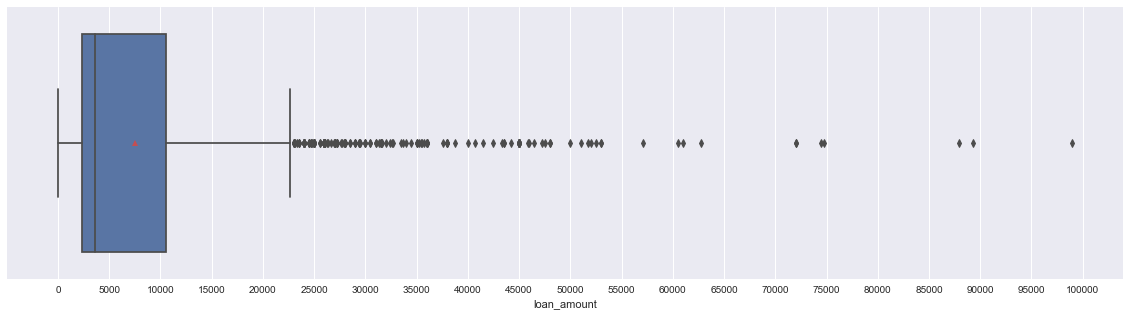

In [76]:
sns.set(rc={'figure.figsize':(20,5)})
x = sns.boxplot(x="loan_amount",  data=village_applied, orient='h',showmeans=True)
x.xaxis.set_major_locator(ticker.MultipleLocator(5000))
plt.show(x)

In [121]:
[print(i) for i in village_applied.village.values[:10]]

sirigere
soravanahalli
bendekere
s.m krishnagara
nippani
gubbi
hirehalli village panchayatha
hosur
marasanige
hampapura  village panchayatha


[None, None, None, None, None, None, None, None, None, None]

> ### Top spenders on loan:
* sirigere
* soravanahalli
* bendekere
* s.m krishnagara
* nippani
* gubbi
* hirehalli village panchayatha
* hosur
* marasanige
* hampapura  village panchayatha

In [122]:
[print(i) for i in village_applied.village.values[-10:]]

t.bettahalli
guttahalli
thungani
hunkunda
dharmaraya nagara
gummanakolli
kennalu
amachavadi
malangi
hankere


[None, None, None, None, None, None, None, None, None, None]

> ### Least spenders on loan:
* t.bettahalli
* guttahalli
* thungani
* hunkunda
* dharmaraya nagara
* gummanakolli
* kennalu
* amachavadi
* malangi
* hankere

### Month and loan

In [79]:
month_applied = trend_prod.groupby(["month_applied"],as_index=False).sum().sort_values("loan_amount",ascending=False)
month_applied

month_applied   group_id  member_id  loan_amount  loan_account_number  \
8               9  381361266       4979    4054260.0            154367667   
0               1  401784643       4070    3746364.0            185429976   
2               3  419642896       4365    3233050.0            154842977   
6               7  153468522       2293    2738406.0             73651114   
10             11  335758838       3354    2472925.0            108743480   
9              10  214643031       2545    2353224.0             65342678   
11             12  189221903       2128    2063760.0             68745949   
5               6  119780424       1416    1936177.0             52844411   
1               2  152017473       1860    1809280.0             60905015   
4               5   45817548        509     830920.0             18316238   
7               8   59121445        811     739600.0             22406793   
3               4   60708643        799     622230.0             40116067   

    product_id  branch_id  difference_days  month_installed  
8      33227.0   100587.0             3093             7843  
0      27677.0    93095.0             2748              751  
2      28667.0    91471.0             2353             2232  
6      15121.0    46448.0             1511             2705  
10     21883.0    67271.0             2358             6314  
9      16138.0    44538.0             2130             4296  
11     14198.0    53808.0             1804             2850  
5      10205.0    18121.0             1199             1638  
1      12064.0    33200.0             1418              744  
4       3816.0    11195.0              456              524  
7       5052.0    27183.0              640             1170  
3       5151.0     9735.0              476              547

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


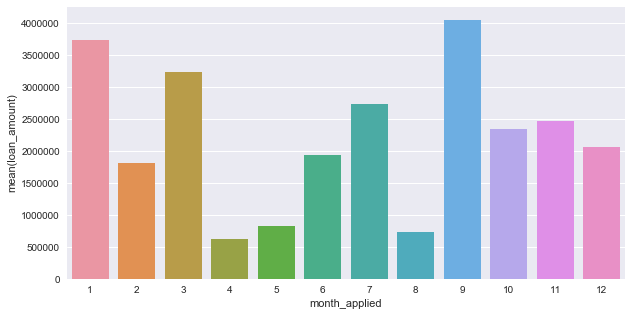

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(month_applied.month_applied, month_applied.loan_amount)

### month and installation

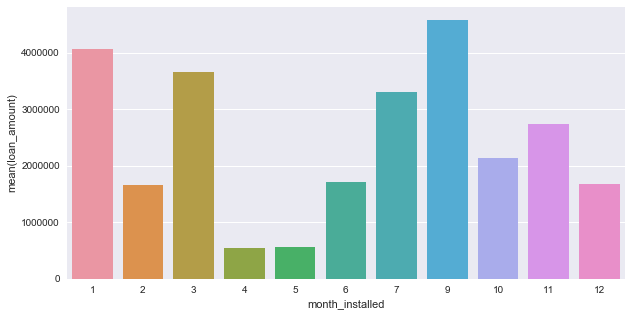

In [81]:
month_installed = trend_prod.groupby(["month_installed"],as_index=False).sum().sort_values("loan_amount",ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(month_installed.month_installed, month_installed.loan_amount)

> ### Nothing is being installed in the month of August

### Village and delay

In [82]:
village_delay = trend_prod.groupby(["village"],as_index=False).mean().sort_values("difference_days",ascending=False)
village_delay

village  group_id  member_id   loan_amount  \
1031                        ingalagundi  182325.0        2.0  12174.000000   
1376                         kotthegala  213004.5        3.5   4959.000000   
489   chikkakereyur village panchayatha  227001.2        6.6  11287.400000   
609                    doddadasenahalli  556155.0        6.0   4214.666667   
1401             kumbalagodu gollahalli  591152.0        9.0   2350.000000   
...                                 ...       ...        ...           ...   
2039                        sasalakunte   48488.0        1.0   2350.000000   
2377                        w/o gidappa  786721.0        8.0   2350.000000   
1421                           kunthuru  851223.0        8.0  12500.000000   
569                            devanuru  231129.0        9.0  10000.000000   
767         hadadi-batlakatte-7ne kallu  270843.0        4.0  15300.000000   

      loan_account_number  product_id  branch_id  difference_days  \
1031         74379.000000        36.0       61.0       105.000000   
1376        128223.000000        36.5       69.0        72.500000   
489          73376.600000        41.4       63.0        48.800000   
609          51123.666667        39.0      129.0        35.333333   
1401        638621.000000        38.0      136.0        35.000000   
...                   ...         ...        ...              ...   
2039         83142.000000        38.0       51.0         0.000000   
2377        315942.000000        38.0       15.0         0.000000   
1421        356800.000000        36.0       22.0         0.000000   
569         119208.000000        43.0       64.0         0.000000   
767         307121.000000        50.0       84.0         0.000000   

      month_installed  month_applied  
1031              5.0       1.000000  
1376             11.0       8.250000  
489               6.4       4.800000  
609               7.0       9.333333  
1401              3.0       2.000000  
...               ...            ...  
2039              3.0       3.000000  
2377              9.0       9.000000  
1421              3.0       3.000000  
569              10.0      10.000000  
767               7.0       7.000000  

[2498 rows x 10 columns]

In [83]:
[print(i) for i in village_delay[:10]["village"].values]

ingalagundi
kotthegala
chikkakereyur village panchayatha
doddadasenahalli
kumbalagodu gollahalli
appenahalli
yakatpur
harave
sihi neerina kola
anekal (rural)


[None, None, None, None, None, None, None, None, None, None]

> ### Top 10  Villages with the most delay on an average of more than 15 days
> * ingalagundi
> * kotthegala
> * chikkakereyur village panchayatha
> * doddadasenahalli
> * kumbalagodu gollahalli
> * appenahalli
> * yakatpur
> * harave
> * sihi neerina kola
> * anekal (rural)

### village vs model

In [84]:
model_village = trend_prod.groupby(["name_of_model",'village'],as_index=False).count().sort_values(['name_of_model',"group_id"], ascending=False)

In [85]:
# top 10 villages which are purchasing each models
for i in model_village.name_of_model.unique():
    x = model_village[model_village.name_of_model==i]
    print(i,":")
    [print(j) for j in x["village"][:10].values]
    print("=========================================================")

sh4hls :
sirigere
ajri
arala
karagadde
amparu
anekere
bagivalu
bajaguru
belve
honnavalli
sb9hls :
almatti
badami
hanagodu
navalgund  c
nelyady
t.nulenuru
venkatagiri
sb8hls :
anaberu
avarse
belve
devi nagara
hirebidanal
hosur
34 kudi
74 ulluru
balya
belle
sb6hls :
hadalageri
hakladi
hosahalli
karakuchi
kuchoor
mattur
sb4hls :
b.kanaboor
soravanahalli
aduvalli
devadana
gangavathi
agumbe (talluru)
aramanekoppa
avargere
bairidevarakoppa
basavana bagevadi (tmc)
sb2hls :
hampapura  village panchayatha
chennipuramole
karagunda
rangapura
bendekere
hanagodu
hasudi-a
huduguru
mahadevapura
old hubli
s15hls :
amaramudnooru
badagabelluru
kanasinakatte(sidlipura)
marasanige
s.m krishnagara
s14hls :
bukkambudi
devachalla
gubbi
gudigondanahalli
heggala
horanadu
jalsoor
karkeshwar
kodiyala
kolake gadde house, kavalamooduru village,kavalakatte.
s10hls :
kattimallenahalli
adki
bijkal
d/o. lingappa gowda, kamarkaje  house, kombaru  village, puttur
gunduri
heggere
kukkala
kushtagi-b.b nagar
morageri
mullu

### Year wise loan amount

In [86]:
trend_prod["year_applied"] = [i.year for i in trend_prod.document_signature_date]
trend_prod["year_installed"] = [i.year for i in trend_prod.product_installed_date]
trend_prod["year_difference"] = trend_prod["year_installed"] - trend_prod["year_applied"]
trend_prod.head()

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

village  group_id  member_id circle_name  loan_amount  \
0     honnavalli     27674          1    j.c pura      15500.0   
1  amaramudnooru    650604         15     bellare      53000.0   
2      purasabhe    376321          6   purasabhe       9000.0   
3     mekalmardi     60589          4     nesargi       8000.0   
4         bijkal    287722          2    kushtagi      36000.0   

        product_type name_of_model manufacturer_name  loan_account_number  \
0  solar light selco        sh4hls             selco                99155   
1  solar light selco        s15hls             selco               369065   
2  solar light selco        eh2hls             selco               169976   
3  solar light selco        eh2hls             selco               137608   
4  solar light selco        s10hls             selco               114405   

      loan_application_date    product_installed_date  \
0 2018-06-11 18:30:00+00:00 2018-06-17 18:30:00+00:00   
1 2019-01-06 18:30:00+00:00 2019-01-09 18:30:00+00:00   
2 2018-06-01 18:30:00+00:00 2018-06-03 18:30:00+00:00   
3 2018-09-23 18:30:00+00:00 2018-09-24 18:30:00+00:00   
4 2019-03-14 18:30:00+00:00 2019-03-17 18:30:00+00:00   

    document_signature_date     loan_id  product_id  branch_id  \
0 2018-06-11 18:30:00+00:00    57-99155        50.0       55.0   
1 2019-01-06 18:30:00+00:00    4-369065        42.0        4.0   
2 2018-06-01 18:30:00+00:00  102-169976        35.0       94.0   
3 2018-09-23 18:30:00+00:00   50-137608        35.0       48.0   
4 2019-03-14 18:30:00+00:00   83-114405        40.0       80.0   

   difference_days  month_installed  month_applied  year_applied  \
0                6                6              6          2018   
1                3                1              1          2019   
2                2                6              6          2018   
3                1                9              9          2018   
4                3                3              3          2019   

   year_installed  year_difference  
0            2018                0  
1            2019                0  
2            2018                0  
3            2018                0  
4            2019                0

<BarContainer object of 3 artists>

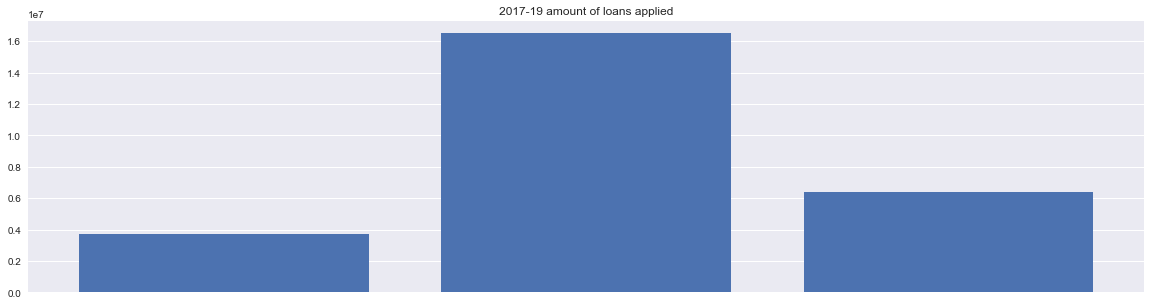

In [87]:
plt.xticks(range(1,4))
plt.title("2017-19 amount of loans applied")
plt.bar(list(trend_prod.groupby(["year_applied"]).sum().index),trend_prod.groupby(["year_applied"]).sum()["loan_amount"])

###  Year vs installation count

<BarContainer object of 3 artists>

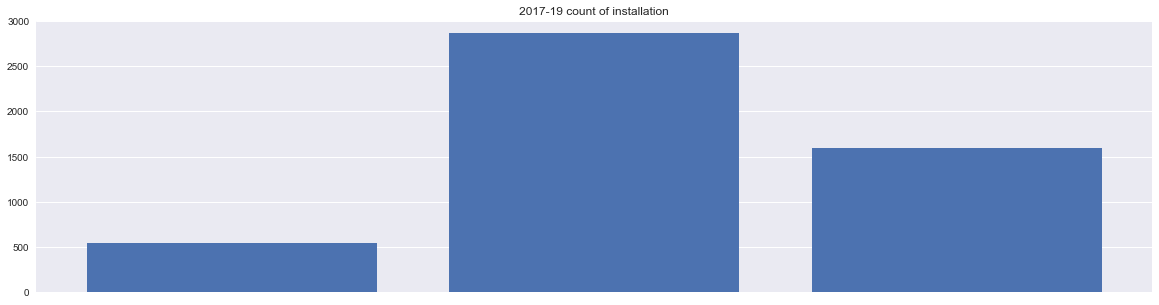

In [88]:
plt.xticks(range(1,4))
plt.title("2017-19 count of installation")
plt.bar(list(trend_prod.groupby(["year_installed"]).count().index),trend_prod.groupby(["year_installed"]).count()["difference_days"])

## exploring branches and circles

In [89]:
df.groupby(["village","branch_name","circle_name"]).count()

0  group_id  \
village                    branch_name    circle_name                   
13ne ward                  arkalgud       kasaba          2         2   
151/2 vasarakudrige ankola karwar         belekeri        1         1   
23 ward                    shrinivasapura purasabe        6         6   
2nd nagarthpete            shidlaghatta   shidlaghatta b  1         1   
34 kudi                    udupi          kokkarne        3         3   
...                                                      ..       ...   
yedrami                    jevargi        yadrami         1         1   
yelburga                   yelburga       yelaburga       1         1   
yelimunnoli                hukkeri        hukkeri         4         4   
yenkura                    bhalki         katakchincolli  1         1   
yerlapady                  karkala        karkala rural   2         2   

                                                          member_id  \
village                    branch_name    circle_name                 
13ne ward                  arkalgud       kasaba                  2   
151/2 vasarakudrige ankola karwar         belekeri                1   
23 ward                    shrinivasapura purasabe                6   
2nd nagarthpete            shidlaghatta   shidlaghatta b          1   
34 kudi                    udupi          kokkarne                3   
...                                                             ...   
yedrami                    jevargi        yadrami                 1   
yelburga                   yelburga       yelaburga               1   
yelimunnoli                hukkeri        hukkeri                 4   
yenkura                    bhalki         katakchincolli          1   
yerlapady                  karkala        karkala rural           2   

                                                          loan_amount  \
village                    branch_name    circle_name                   
13ne ward                  arkalgud       kasaba                    2   
151/2 vasarakudrige ankola karwar         belekeri                  1   
23 ward                    shrinivasapura purasabe                  6   
2nd nagarthpete            shidlaghatta   shidlaghatta b            1   
34 kudi                    udupi          kokkarne                  3   
...                                                               ...   
yedrami                    jevargi        yadrami                   1   
yelburga                   yelburga       yelaburga                 1   
yelimunnoli                hukkeri        hukkeri                   4   
yenkura                    bhalki         katakchincolli            1   
yerlapady                  karkala        karkala rural             2   

                                                          product_type  \
village                    branch_name    circle_name                    
13ne ward                  arkalgud       kasaba                     2   
151/2 vasarakudrige ankola karwar         belekeri                   1   
23 ward                    shrinivasapura purasabe                   6   
2nd nagarthpete            shidlaghatta   shidlaghatta b             1   
34 kudi                    udupi          kokkarne                   3   
...                                                                ...   
yedrami                    jevargi        yadrami                    1   
yelburga                   yelburga       yelaburga                  1   
yelimunnoli                hukkeri        hukkeri                    4   
yenkura                    bhalki         katakchincolli             1   
yerlapady                  karkala        karkala rural              2   

                                                          name_of_model  \
village                    branch_name    circle_name                     
13ne ward                  arkalgud       kasaba                      2   
151/2 vasarakudrige ankola karwar         bele

> ### There is no hierarchy between village, branch and circle name

In [100]:
# dealing with branches and circles similar to that of villages
# repeat what was done for village , for braches and circle and a combination of the three

### branches

In [105]:
pd.set_option('display.max_rows', 100)
branch_name_month = trend_prod.groupby(['branch_name',"month_installed"],as_index=False).count()
branch_name_month.head()#.sort_values('group_id',ascending = False)

branch_name  month_installed  village  group_id  member_id  circle_name  \
0    afzalpur                1        1         1          1            1   
1    afzalpur                3        4         4          4            4   
2    afzalpur               12        1         1          1            1   
3       aland                2        1         1          1            1   
4       aland                3        9         9          9            9   

   loan_amount  product_type  name_of_model  manufacturer_name  \
0            1             1              1                  1   
1            4             4              4                  4   
2            1             1              1                  1   
3            1             1              1                  1   
4            9             9              9                  9   

   loan_account_number  loan_application_date  product_installed_date  \
0                    1                      1                       1   
1                    4                      4                       4   
2                    1                      1                       1   
3                    1                      1                       1   
4                    9                      9                       9   

   document_signature_date  loan_id  product_id  branch_id  difference_days  \
0                        1        1           1          1                1   
1                        4        4           4          4                4   
2                        1        1           1          1                1   
3                        1        1           1          1                1   
4                        9        9           9          9                9   

   month_applied  
0              1  
1              4  
2              1  
3              1  
4              9

### branch_name wise installation of products

branch_name wise trend of 'gubbi' getting installed 


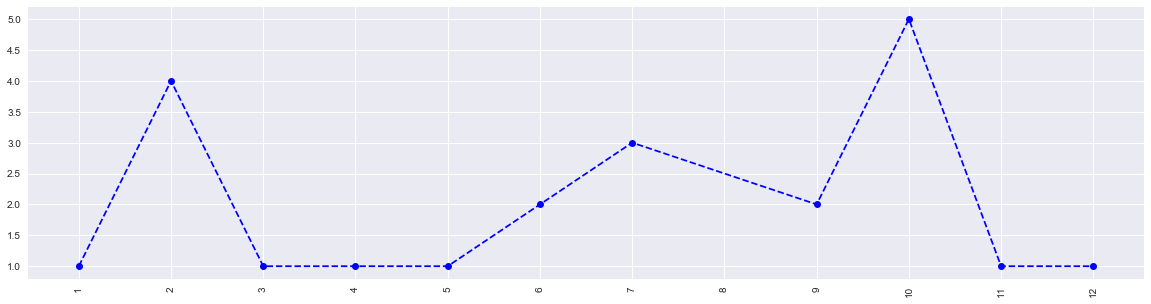

branch_name wise trend of 'hubli' getting installed 


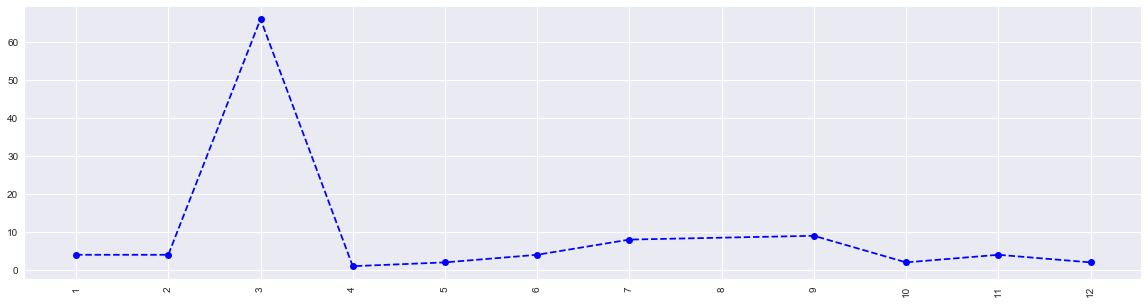

branch_name wise trend of 'koppa' getting installed 


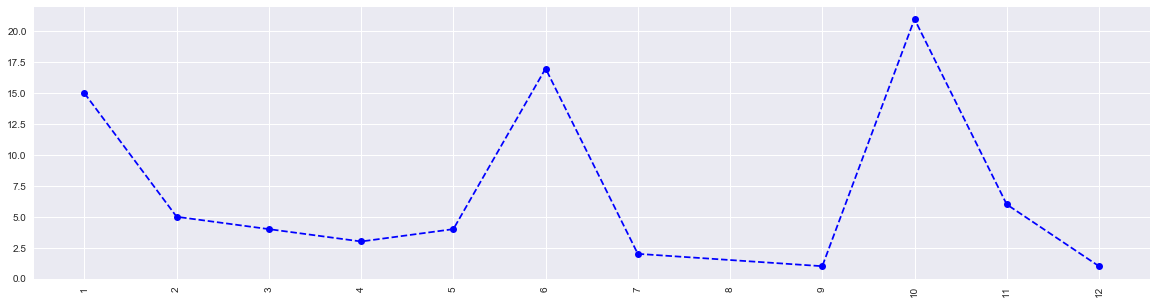

branch_name wise trend of 'kundapur' getting installed 


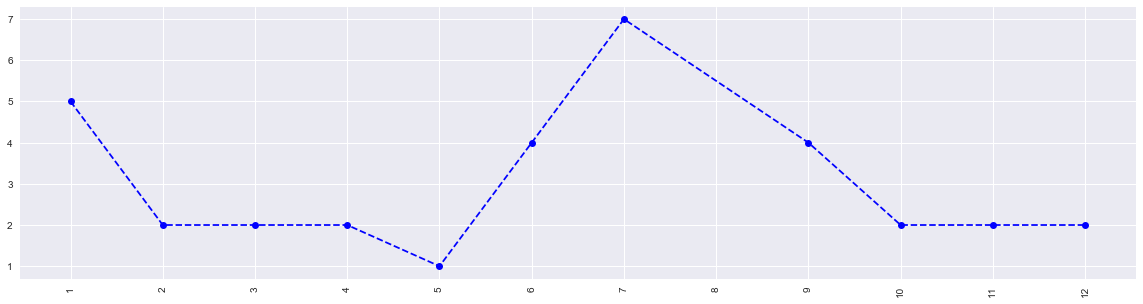

branch_name wise trend of 'mulubagilu' getting installed 


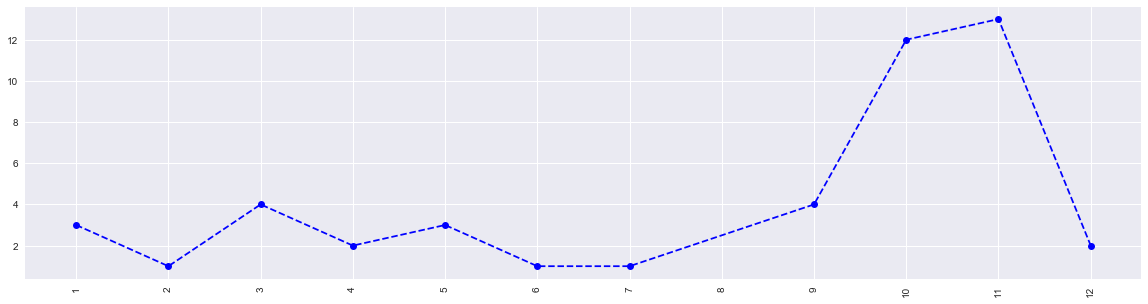

branch_name wise trend of 'udupi' getting installed 


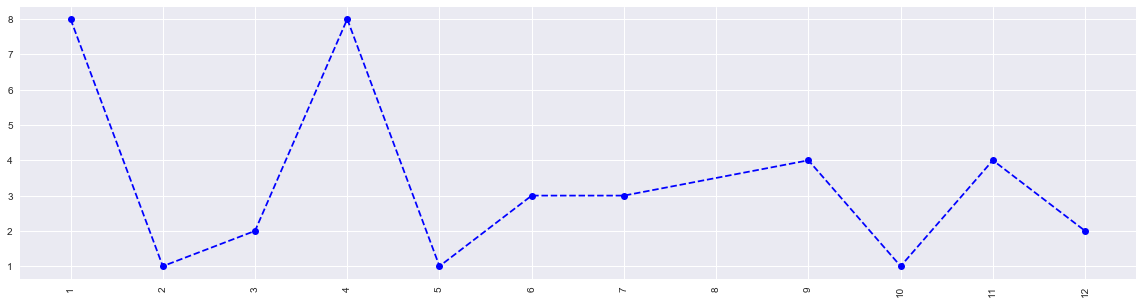

In [112]:
# only for the branch_names with more than 10 months of installation
for i in branch_name_month.branch_name.unique():
    x = branch_name_month[branch_name_month["branch_name"]==i]
    if(x.shape[0]>10):
        print("branch_name wise trend of '{}' getting installed ".format(i))
        plt.plot(x.month_installed,x.group_id, '--bo')
        plt.xticks(range(1,13),rotation=90)
        plt.show()

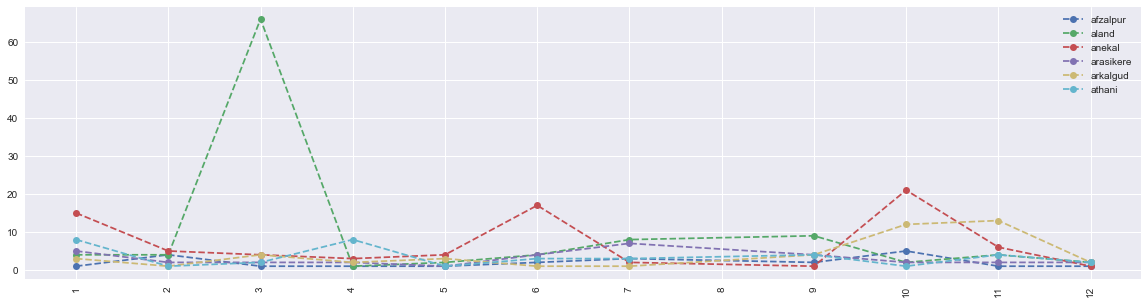

In [111]:
# only for the branch_names with more than 10 months of installation
l = []
for i in branch_name_month.branch_name.unique():
    x = branch_name_month[branch_name_month["branch_name"]==i]
    if(x.shape[0]>10):
        plt.plot(x.month_installed,x.group_id, '--o')
    plt.xticks(range(1,13),rotation=90)
    l.append(i)
    plt.legend(l)
plt.show()

### branch_name and loan

In [118]:
branch_name_applied = trend_prod.groupby(['branch_name'],as_index=False).sum().sort_values("loan_amount",ascending=False)
branch_name_applied.head(10)

branch_name  group_id  member_id  loan_amount  loan_account_number  \
3     arasikere  35908546        551     806800.0             15821694   
153  turuvekere   2345849        610     798510.0             12857204   
83        koppa  67265753        620     629590.0             22608428   
147      sullia  13701270        136     570950.0              7245910   
66        hubli  52402766        735     552850.0             36776666   
31      chikodi  27876737        645     551250.0             21619365   
92     kundapur  22539058        214     507200.0             27818346   
154       udupi  24905241        250     505550.0             28958912   
106   moodigere  31910429        300     456150.0              9739886   
4      arkalgud  13460430        372     439640.0             11483772   

     product_id  branch_id  difference_days  month_installed  month_applied  
3        3805.0     9016.0              403              660            683  
153      4111.0     6048.0              382              500            575  
83       2988.0     1738.0              287              482            505  
147       912.0       84.0              123              166            160  
66       4104.0     3286.0              501              473            456  
31       4521.0     5203.0              264              874            865  
92       1498.0      396.0              129              203            210  
154      1599.0      407.0              100              206            212  
106      1419.0      222.0              151              215            217  
4        2442.0     4225.0              208              517            515

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


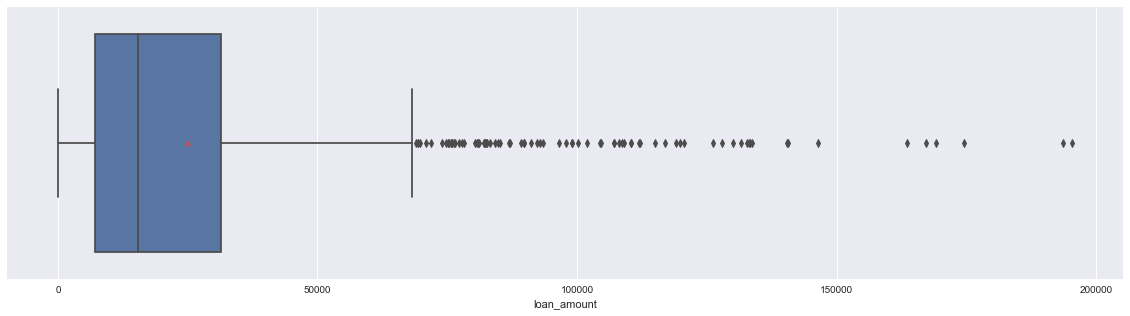

In [114]:
sns.set(rc={'figure.figsize':(20,5)})
x = sns.boxplot(x="loan_amount",  data=branch_name_applied, orient='h',showmeans=True)
x.xaxis.set_major_locator(ticker.MultipleLocator(50000))
plt.show(x)

In [124]:
[print(i) for i in branch_name_applied.branch_name.values[:15]]

arasikere
turuvekere
koppa
sullia
hubli
chikodi
kundapur
udupi
moodigere
arkalgud
chitradurga
hunsur
heggadevanakote
bantwal
honnavar


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

> ### Top spender
* arasikere
* turuvekere
* koppa
* sullia
* hubli
* chikodi
* kundapur
* udupi
* moodigere
* arkalgud

In [125]:
[print(i) for i in branch_name_applied.branch_name.values[-15:]]

mudhol
mudalagi
manvi
bagepalli
aland
yadgir
chikkaballapura
gulbarga
rayachur
yelendur
afzalpur
kudligi
harappanahalli
mangalore urban
gauribidanur


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

> ### Least spenders
* mudhol
* mudalagi
* manvi
* bagepalli
* aland
* yadgir
* chikkaballapura
* gulbarga
* rayachur
* yelendur

### branch_name and delay

In [127]:
branch_name_delay = trend_prod.groupby(["branch_name"],as_index=False).mean().sort_values("difference_days",ascending=False)
branch_name_delay.head()

branch_name       group_id  member_id  loan_amount  \
55         hirekerur  172060.708333   6.583333  3965.583333   
88           kudligi  442340.833333   5.166667  2165.000000   
69            hunsur  212146.603774   4.849057  7811.150943   
116      pandavapura  386187.323529   4.823529  3397.352941   
54   heggadevanakote  226763.056604   6.000000  7635.226415   

     loan_account_number  product_id  branch_id  difference_days  \
55          86738.916667   38.208333       61.0         9.083333   
88         171825.333333   37.833333      107.0         8.666667   
69         132718.981132   41.320755       69.0         8.584906   
116        127333.235294   38.323529       96.0         7.058824   
54          96151.566038   40.283019       63.0         6.943396   

     month_installed  month_applied  
55          7.416667       6.875000  
88          4.166667       4.000000  
69          6.301887       5.962264  
116         5.794118       7.500000  
54          6.830189       6.660377

In [128]:
[print(i) for i in branch_name_delay[:10]["branch_name"].values]
### Top 10  branch_names with the most delay on an average of more than 15 days

hirekerur
kudligi
hunsur
pandavapura
heggadevanakote
shrirangapatna
kumble-kasargud
basavakalyan
kinnigoli
malavalli


[None, None, None, None, None, None, None, None, None, None]

### branch_name vs model

In [129]:
model_branch_name = trend_prod.groupby(["name_of_model",'branch_name'],as_index=False).count().sort_values(['name_of_model',"group_id"], ascending=False)

In [130]:
# top 10 branch_names which are purchasing each models
for i in model_branch_name.name_of_model.unique():
    x = model_branch_name[model_branch_name.name_of_model==i]
    print(i,":")
    [print(j) for j in x["branch_name"][:10].values]
    print("=========================================================")



sh4hls :
kundapur
turuvekere
chitradurga
honnavar
sullia
tiptur
udupi
bantwal
hunsur
virajpet
sb9hls :
badami
basavan bagevadi
gangavathi
holalkere
hunsur
navalgunda
puttur
sb8hls :
udupi
kundapur
yelburga
bantwal
karkala
puttur
chitradurga
davanagere
kumble-kasargud
sedam
sb6hls :
karkala
kundapur b
lingsugar
malavalli
muddebihal
tarikere
sb4hls :
koppa
turuvekere
dharwad
karwar
sedam
tirthahalli
belur
chikamagalur
chincholi
chitradurga
sb2hls :
arasikere
heggadevanakote
hunsur
hubli
shrirangapatna
shimoga
krishnarajnagara
krishnarajapete
thirumakodlu-narasipura
kundagol
s15hls :
bantwal
bhadravathi
hubli
moodigere
sullia
s14hls :
sullia
bantwal
gubbi
koppa
moodigere
puttur
somwarpet
tarikere
tiptur
virajpet
s10hls :
belthangady
arkalgud
kushtagi
bantwal
hagaribommanahalli
kollegal
puttur
sedam
siruguppa
tumkur
gssv3 :
shrirangapatna
shidlaghatta
kanakapura
magadi
pandavapura
turuvekere
nagamangala
bangarpete
malavalli
thirumakodlu-narasipura
gjs1 :
muddebihal
chikodi
hubli
homnabad
k

### circles

In [131]:
pd.set_option('display.max_rows', 100)
circle_name_month = trend_prod.groupby(['circle_name',"month_installed"],as_index=False).count()
circle_name_month.head()#.sort_values('group_id',ascending = False)

circle_name  month_installed  village  group_id  member_id  branch_name  \
0  aadaragunchi                6        1         1          1            1   
1  aadaragunchi                9        1         1          1            1   
2  aadaragunchi               11        1         1          1            1   
3      ab nagar                1        4         4          4            4   
4      ab nagar                3        2         2          2            2   

   loan_amount  product_type  name_of_model  manufacturer_name  \
0            1             1              1                  1   
1            1             1              1                  1   
2            1             1              1                  1   
3            4             4              4                  4   
4            2             2              2                  2   

   loan_account_number  loan_application_date  product_installed_date  \
0                    1                      1                       1   
1                    1                      1                       1   
2                    1                      1                       1   
3                    4                      4                       4   
4                    2                      2                       2   

   document_signature_date  loan_id  product_id  branch_id  difference_days  \
0                        1        1           1          1                1   
1                        1        1           1          1                1   
2                        1        1           1          1                1   
3                        4        4           4          4                4   
4                        2        2           2          2                2   

   month_applied  
0              1  
1              1  
2              1  
3              4  
4              2

### circle_name wise installation of products

circle_name wise trend of 'arekere' getting installed 


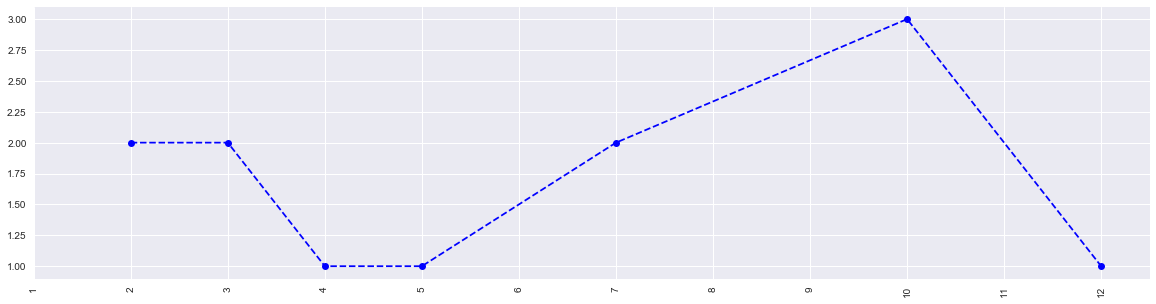

circle_name wise trend of 'bindiganavile' getting installed 


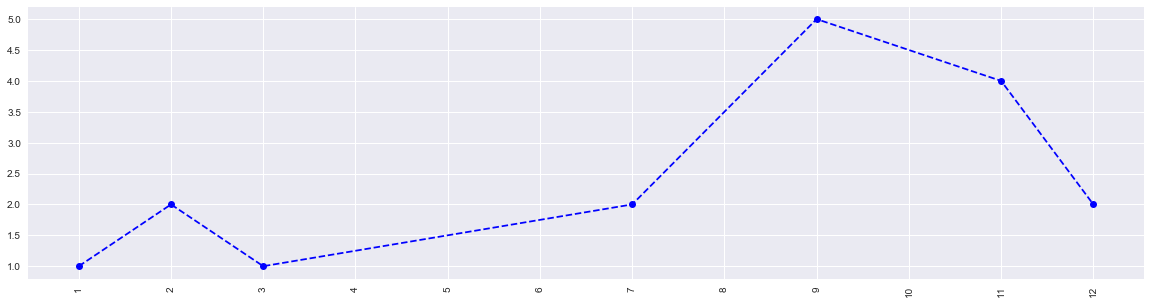

circle_name wise trend of 'chimangala' getting installed 


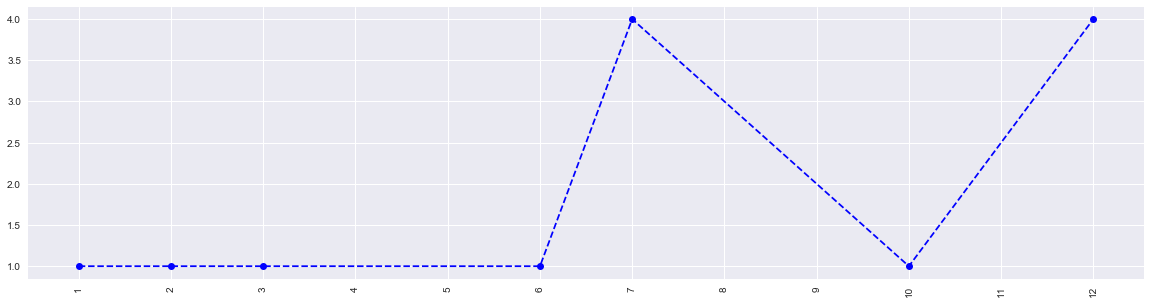

circle_name wise trend of 'dhandinashivara' getting installed 


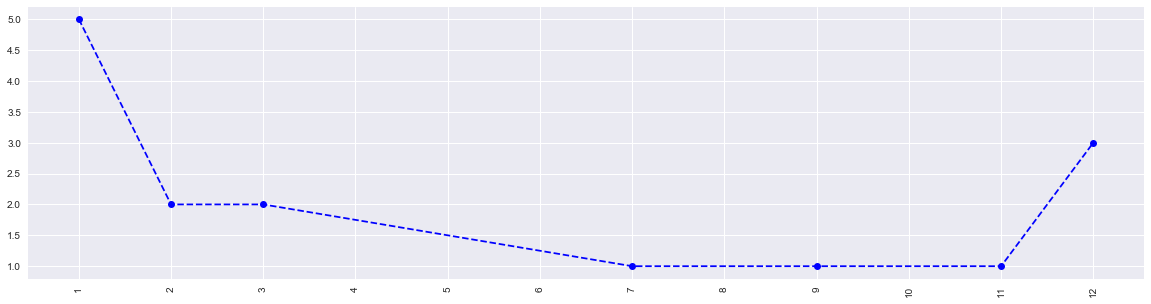

circle_name wise trend of 'gubbi' getting installed 


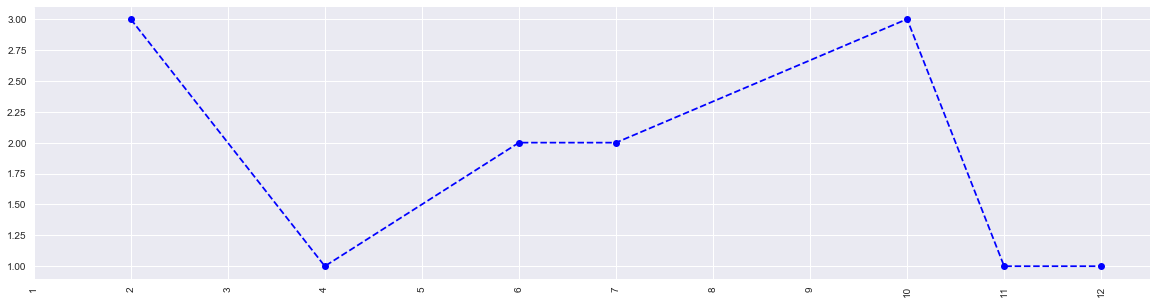

circle_name wise trend of 'hampapura' getting installed 


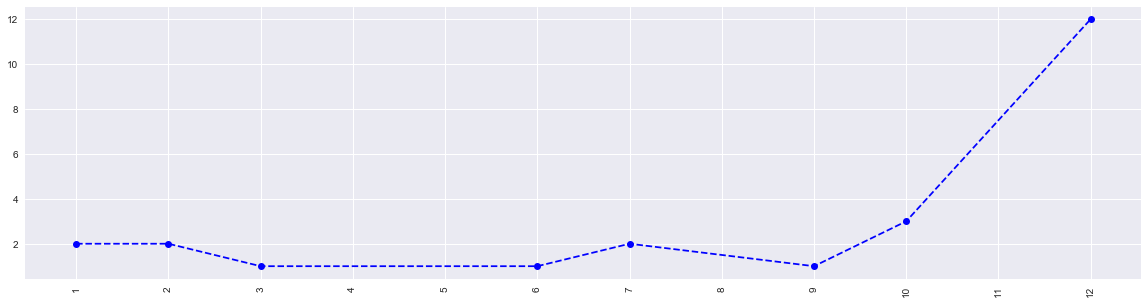

circle_name wise trend of 'haranahalli' getting installed 


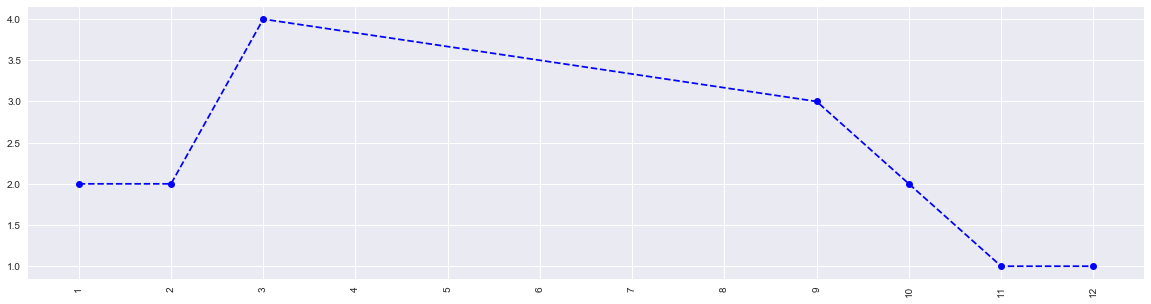

circle_name wise trend of 'karnakuppe' getting installed 


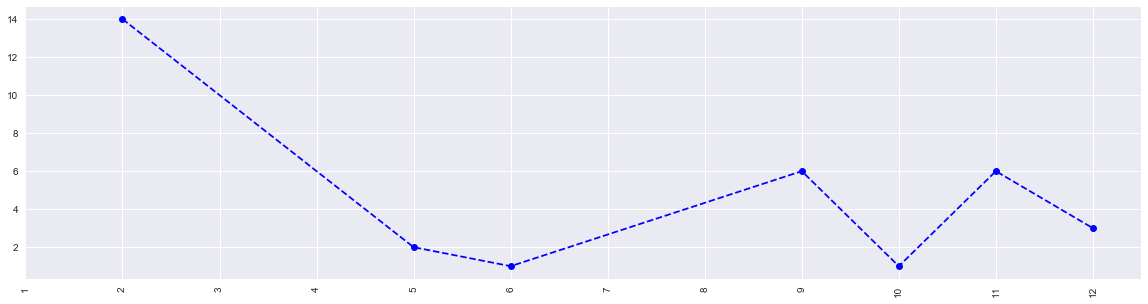

circle_name wise trend of 'kasaba' getting installed 


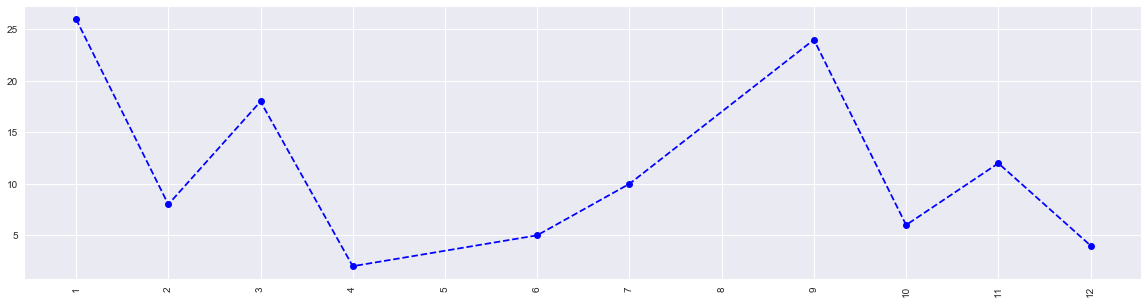

circle_name wise trend of 'kondajji' getting installed 


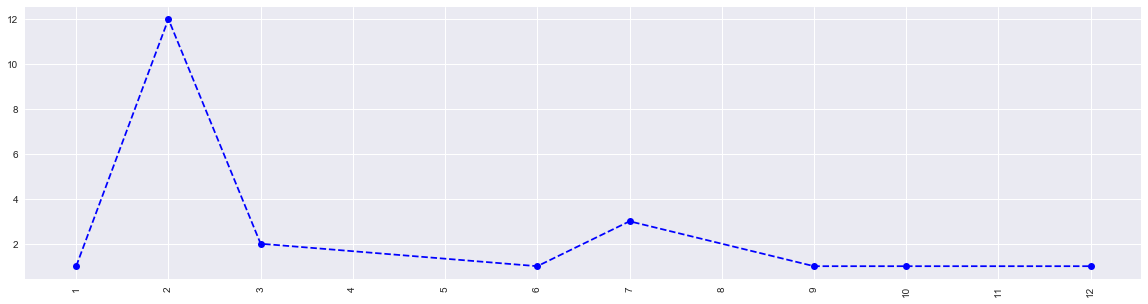

circle_name wise trend of 'soravanahalli' getting installed 


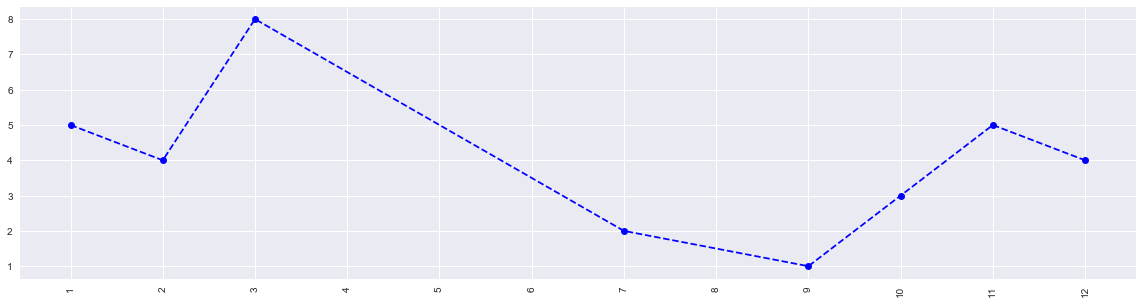

In [138]:
# only for the circle_names with more than 6 months of installation
for i in circle_name_month.circle_name.unique():
    x = circle_name_month[circle_name_month["circle_name"]==i]
    if(x.shape[0]>6):
        print("circle_name wise trend of '{}' getting installed ".format(i))
        plt.plot(x.month_installed,x.group_id, '--bo')
        plt.xticks(range(1,13),rotation=90)
        plt.show()

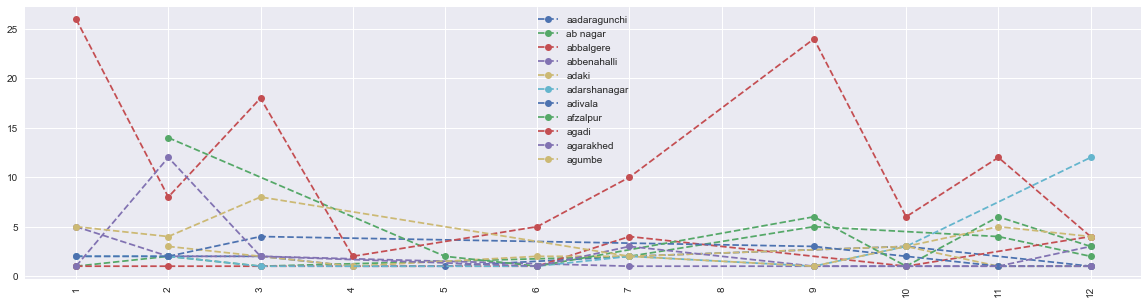

In [136]:
# only for the circle_names with more than 6 months of installation
l = []
for i in circle_name_month.circle_name.unique():
    x = circle_name_month[circle_name_month["circle_name"]==i]
    if(x.shape[0]>6):
        plt.plot(x.month_installed,x.group_id, '--o')
    plt.xticks(range(1,13),rotation=90)
    l.append(i)
    plt.legend(l)
plt.show()

### circle_name and loan

In [134]:
circle_name_applied = trend_prod.groupby(['circle_name',"month_applied"],as_index=False).sum().sort_values("loan_amount",ascending=False)
circle_name_applied.head()

circle_name  month_applied  group_id  member_id  loan_amount  \
729    guthigaru              8   3917520         40     174600.0   
730    guthigaru              9   5218315         53     169200.0   
1196      kasaba              1   9704420        203     151660.0   
1202      kasaba              7   2317332         56     144450.0   
227   balehonnur              5   8511885         80     130500.0   

      loan_account_number  product_id  branch_id  difference_days  \
729               2079179       258.0       24.0               63   
730               2829999       352.0       32.0               27   
1196              4793535      1008.0     2607.0              109   
1202              1389140       346.0      584.0               49   
227               2999098       404.0      220.0               70   

      month_installed  
729                54  
730                72  
1196               27  
1202               63  
227                60

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


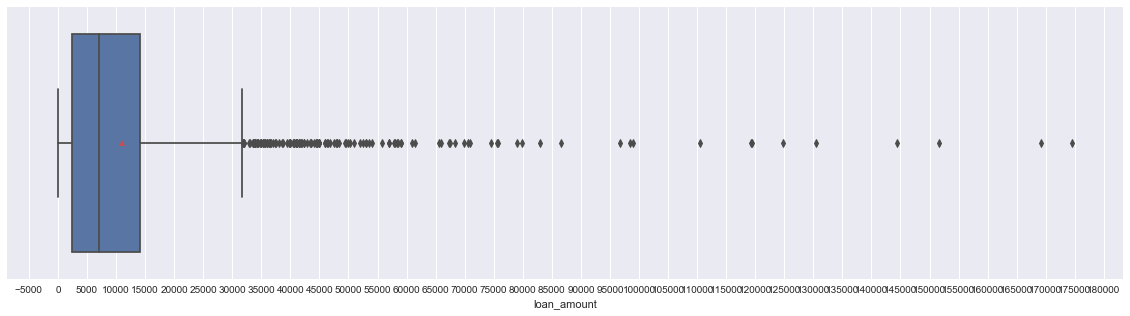

In [135]:
sns.set(rc={'figure.figsize':(20,5)})
x = sns.boxplot(x="loan_amount",  data=circle_name_applied, orient='h',showmeans=True)
x.xaxis.set_major_locator(ticker.MultipleLocator(5000))
plt.show(x)

### Top spending circles

In [137]:
[print(i) for i in circle_name_applied.circle_name.values[:10]]

guthigaru
guthigaru
kasaba
kasaba
balehonnur
kasaba
sirigere
kondajji
virajpet
gabbur


[None, None, None, None, None, None, None, None, None, None]

### Least spending circles

In [139]:
[print(i) for i in circle_name_applied.circle_name.values[-10:]]

bagepalli b
kudlur
bannuru
nagaragere
chimangala
bannuru
thalagavadi
venkatagiri kote
bidadi
mishrikoti


[None, None, None, None, None, None, None, None, None, None]

### circle_name and delay

In [140]:
circle_name_delay = trend_prod.groupby(["circle_name"],as_index=False).mean().sort_values("difference_days",ascending=False)
circle_name_delay.head()

circle_name       group_id  member_id  loan_amount  loan_account_number  \
360    hirekerur  175969.000000   3.333333  5624.666667         91271.666667   
565  kumbalagodu  591152.000000   9.000000  2350.000000        638621.000000   
296     gudekote  440172.000000   8.000000  2350.000000        190389.000000   
604     madapura  230969.526316   6.736842  8573.526316        149522.263158   
265     eachanal  467363.000000   4.000000  9500.000000         59628.000000   

     product_id   branch_id  difference_days  month_installed  month_applied  
360   37.333333   61.000000        39.000000         3.666667       1.666667  
565   38.000000  136.000000        35.000000         3.000000       2.000000  
296   38.000000  107.000000        32.000000         3.000000       2.000000  
604   40.894737   66.421053        15.473684         5.421053       5.000000  
265   43.000000  112.000000        14.000000        10.000000      10.000000

### Top 10  circle_names with the most delay on an average of more than 15 days

In [141]:
[print(i) for i in circle_name_delay[:10]["circle_name"].values]

hirekerur
kumbalagodu
gudekote
madapura
eachanal
karnakuppe
morageri
k.honnalagere
aralakuppe
kaniyoor


[None, None, None, None, None, None, None, None, None, None]

### circle_name vs model

In [142]:
model_circle_name = trend_prod.groupby(["name_of_model",'circle_name'],as_index=False).count().sort_values(['name_of_model',"group_id"], ascending=False)

In [143]:
# top 10 circle_names which are purchasing each models
for i in model_circle_name.name_of_model.unique():
    x = model_circle_name[model_circle_name.name_of_model==i]
    print(i,":")
    [print(j) for j in x["circle_name"][:10].values]
    print("=========================================================")


sh4hls :
amparu
guthigaru
sirigere
kasaba
kalasa
karadi
karnakuppe
kokkarne
manki
siddakatte
sb9hls :
guledgudd
hanagodu
hd pura
navalagund
nelyady
nidagundi
venkatagiri
sb8hls :
kokkarne
amparu
baada
brahmavara
haladi
hebri
kumble
mandarthi
mangaluru
nelyady
sb6hls :
belakavadi
hebri
hullur
lakkavalli
nagalapur
vandse
sb4hls :
balehonnur
agumbe
soravanahalli
bherya
chandapur
gangavathi
honnavar
jayapura
kasaba
khandya
sb2hls :
hampapura
haranahalli
madapura
pillangeri
arekere
ankola
hanagodu
kanakatte
kudige
antharasanthe
s15hls :
b.c road
bellare
gabbur
holehonnuru
kalasa
s14hls :
guthigaru
bellare
gubbi
honnavalli
jayapura
kalasa
nelyady
sampaje
shivani
shuntikoppa
s10hls :
kasaba
kushtagi
madanthyar
adaki
bellavi
bevoor
bilinele
kokkada
morageri
mudipu
gssv3 :
kodiyala
kasaba
shidlaghatta a
uyyamballi
shidlaghatta b
soravanahalli
thippasandra
srirangapatna
bethamangala
chimangala
gjs1 :
kasaba
purasabe
kadaklat
humanabad
muddebihal
daddi
challakere
ranebennur
vijayapur
karnakuppe
e

### For a combination fo village, circle and branch

In [145]:
trend_prod["vbc_name"] =  trend_prod["village"].map(str) + "_" + trend_prod["branch_name"].map(str) + "_" + trend_prod["circle_name"].map(str) 
trend_prod

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


village  group_id  member_id   circle_name  \
0                            honnavalli     27674          1      j.c pura   
1                         amaramudnooru    650604         15       bellare   
2                             purasabhe    376321          6     purasabhe   
3                            mekalmardi     60589          4       nesargi   
4                                bijkal    287722          2      kushtagi   
...                                 ...       ...        ...           ...   
4995                           horanadu    862449          8        kalasa   
4996  w/o krishna,omkara, shg,kodibettu    673359          1       manipal   
4997                 uralichikkanahalli    477383          6  hesarughatta   
4998                           keregodu    390436          4      keregodu   
4999                         maniknagar    916894          4     humanabad   

         branch_name  loan_amount               product_type name_of_model  \
0             tiptur      15500.0          solar light selco        sh4hls   
1             sullia      53000.0          solar light selco        s15hls   
2     holenarasipura       9000.0          solar light selco        eh2hls   
3        bailahongal       8000.0          solar light selco        eh2hls   
4           kushtagi      36000.0          solar light selco        s10hls   
...              ...          ...                        ...           ...   
4995       moodigere       2350.0  greenway jumbo stove gjs1          gjs1   
4996           udupi      26000.0          solar light selco        sb8hls   
4997   doddaballapur       2350.0  greenway jumbo stove gjs1          gjs1   
4998          mandya       2350.0  greenway jumbo stove gjs1          gjs1   
4999        homnabad       2350.0  greenway jumbo stove gjs1          gjs1   

            manufacturer_name  loan_account_number     loan_application_date  \
0                       selco                99155 2018-06-11 18:30:00+00:00   
1                       selco               369065 2019-01-06 18:30:00+00:00   
2                       selco               169976 2018-06-01 18:30:00+00:00   
3                       selco               137608 2018-09-23 18:30:00+00:00   
4                       selco               114405 2019-03-14 18:30:00+00:00   
...                       ...                  ...                       ...   
4995  greenway grameena infra               296670 2019-03-04 18:30:00+00:00   
4996                    selco               766414 2018-09-21 18:30:00+00:00   
4997  greenway grameena infra               125876 2018-01-22 18:30:00+00:00   
4998  greenway grameena infra               308527 2019-03-08 18:30:00+00:00   
4999  greenway grameena infra               165467 2019-01-06 18:30:00+00:00   

        product_installed_date   document_signature_date     loan_id  \
0    2018-06-17 18:30:00+00:00 2018-06-11 18:30:00+00:00    57-99155   
1    2019-01-09 18:30:00+00:00 2019-01-06 18:30:00+00:00    4-369065   
2    2018-06-03 18:30:00+00:00 2018-06-01 18:30:00+00:00  102-169976   
3    2018-09-24 18:30:00+00:00 2018-09-23 18:30:00+00:00   50-137608   
4    2019-03-17 18:30:00+00:00 2019-03-14 18:30:00+00:00   83-114405   
...                        ...                       ...         ...   
4995 2019-03-05 18:30:00+00:00 2019-03-04 18:30:00+00:00    6-296670   
4996 2018-09-24 18:30:00+00:00 2018-09-21 18:30:00+00:00   11-766414   
4997 2018-01-23 18:30:00+00:00 2018-01-22 18:30:00+00:00  122-125876   
4998 2019-03-11 18:30:00+00:00 2019-03-08 18:30:00+00:00  105-308527   
4999 2019-01-10 18:30:00+00:00 2019-01-06 18:30:00+00:00  154-165467   

      product_id  branch_id  difference_days  month_installed  month_applied  \
0           50.0       55.0                6                6              6   
1           42.0        4.0                3                1              1   
2           35.0       94.0                2                6              6   
3           

In [146]:
pd.set_option('display.max_rows', 100)
vbc_name_month = trend_prod.groupby(['vbc_name',"month_installed"],as_index=False).count()
vbc_name_month.head()#.sort_values('group_id',ascending = False)

vbc_name  month_installed  village  \
0                    13ne ward_arkalgud_kasaba                9        2   
1   151/2 vasarakudrige ankola_karwar_belekeri                9        1   
2              23 ward_shrinivasapura_purasabe                1        4   
3              23 ward_shrinivasapura_purasabe                3        2   
4  2nd nagarthpete_shidlaghatta_shidlaghatta b               10        1   

   group_id  member_id  circle_name  branch_name  loan_amount  product_type  \
0         2          2            2            2            2             2   
1         1          1            1            1            1             1   
2         4          4            4            4            4             4   
3         2          2            2            2            2             2   
4         1          1            1            1            1             1   

   name_of_model  manufacturer_name  loan_account_number  \
0              2                  2                    2   
1              1                  1                    1   
2              4                  4                    4   
3              2                  2                    2   
4              1                  1                    1   

   loan_application_date  product_installed_date  document_signature_date  \
0                      2                       2                        2   
1                      1                       1                        1   
2                      4                       4                        4   
3                      2                       2                        2   
4                      1                       1                        1   

   loan_id  product_id  branch_id  difference_days  month_applied  
0        2           2          2                2              2  
1        1           1          1                1              1  
2        4           4          4                4              4  
3        2           2          2                2              2  
4        1           1          1                1              1

### vbc_name wise installation of products

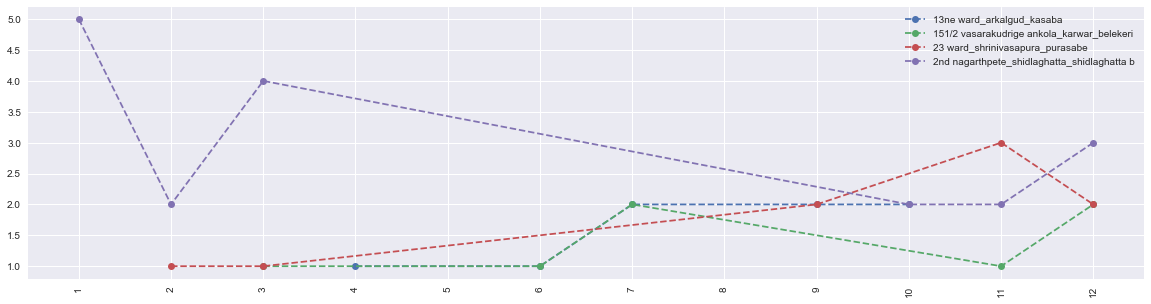

In [157]:
# only for the vbc_names with more than 4 months of installation
l = []
for i in vbc_name_month.vbc_name.unique():
    x = vbc_name_month[vbc_name_month["vbc_name"]==i]
    if(x.shape[0]>4):
        plt.plot(x.month_installed,x.group_id, '--o')
    plt.xticks(range(1,13),rotation=90)
    l.append(i)
    plt.legend(l)
plt.show()

### vbc_name and loan

In [148]:
vbc_name_applied = trend_prod.groupby(['vbc_name',"month_applied"],as_index=False).sum().sort_values("loan_amount",ascending=False)
vbc_name_applied.head()

vbc_name  month_applied  \
2893                       s.m krishnagara_hubli_gabbur              5   
3154                      sirigere_chitradurga_sirigere              6   
1154  hampapura  village panchayatha_heggadevanakote...             12   
1514                            ingali_chikodi_ankali b              9   
1807                  kattimallenahalli_arkalgud_kasaba              7   

      group_id  member_id  loan_amount  loan_account_number  product_id  \
2893   2046262          2      99000.0               530310        77.0   
3154   3596619         74      85600.0              2733183       450.0   
1154   1581681         49      74750.0               553339       308.0   
1514    523037         48      74500.0              1109428       215.0   
1807    413488          4      72000.0               332407        80.0   

      branch_id  difference_days  month_installed  
2893       62.0                5               10  
3154      858.0                4               66  
1154      441.0               14               84  
1514      258.0               16               54  
1807      130.0               14               14

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


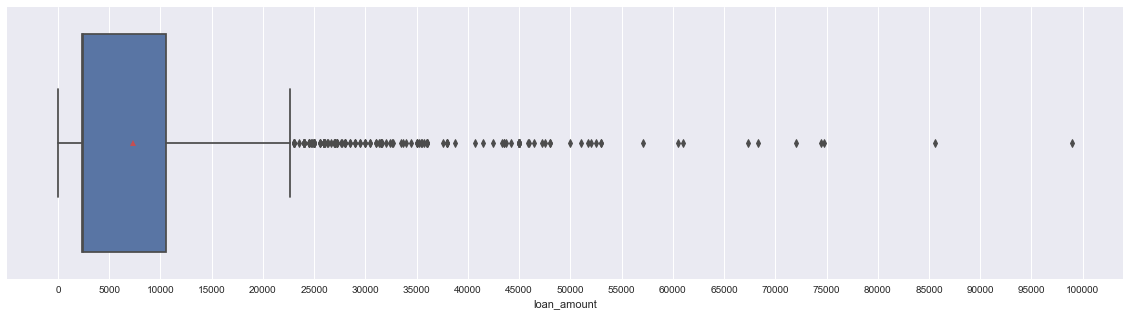

In [149]:
sns.set(rc={'figure.figsize':(20,5)})
x = sns.boxplot(x="loan_amount",  data=vbc_name_applied, orient='h',showmeans=True)
x.xaxis.set_major_locator(ticker.MultipleLocator(5000))
plt.show(x)

### Top spender

In [150]:
[print(i) for i in vbc_name_applied.vbc_name.values[:10]]

s.m krishnagara_hubli_gabbur
sirigere_chitradurga_sirigere
hampapura  village panchayatha_heggadevanakote_hampapura
ingali_chikodi_ankali b
kattimallenahalli_arkalgud_kasaba
gubbi_gubbi_gubbi
gangavathi_gangavathi_gangavathi
marasanige_moodigere_kalasa
heggala_virajpet_virajpet
madhihalli_turuvekere_kasaba


[None, None, None, None, None, None, None, None, None, None]

### Least speding combinations

In [151]:
[print(i) for i in vbc_name_applied.vbc_name.values[-10:]]

gonisomanahally_belur_halebeedu
govindaghatta_turuvekere_thandaga
simse_koppa_shettykoppa
gubbi_gubbi_gubbi
gudemaranahalli_magadi_soluru
shrirangapatna_shrirangapatna_srirangapatna
shrirangapatna_shrirangapatna_kodiyala
gummanakolli_somwarpet_kudige
hebrigadde_kumta_hireguthi
not available_kundagol_mishrikoti


[None, None, None, None, None, None, None, None, None, None]

### vbc_name and delay

In [152]:
vbc_name_delay = trend_prod.groupby(["vbc_name"],as_index=False).mean().sort_values("difference_days",ascending=False)
vbc_name_delay.head()

vbc_name  group_id  member_id  \
1155                    ingalagundi_hirekerur_hirekerur  182325.0        2.0   
1539                       kotthegala_hunsur_karnakuppe  213004.5        3.5   
540   chikkakereyur village panchayatha_heggadevanak...  227001.2        6.6   
673        doddadasenahalli_shidlaghatta_shidlaghatta a  556155.0        6.0   
1564      kumbalagodu gollahalli_ramanagara_kumbalagodu  591152.0        9.0   

       loan_amount  loan_account_number  product_id  branch_id  \
1155  12174.000000         74379.000000        36.0       61.0   
1539   4959.000000        128223.000000        36.5       69.0   
540   11287.400000         73376.600000        41.4       63.0   
673    4214.666667         51123.666667        39.0      129.0   
1564   2350.000000        638621.000000        38.0      136.0   

      difference_days  month_installed  month_applied  
1155       105.000000              5.0       1.000000  
1539        72.500000             11.0       8.250000  
540         48.800000              6.4       4.800000  
673         35.333333              7.0       9.333333  
1564        35.000000              3.0       2.000000

### Top 10  vbc_names with the most delay on an average of more than 15 days

In [153]:
[print(i) for i in vbc_name_delay[:10]["vbc_name"].values]

ingalagundi_hirekerur_hirekerur
kotthegala_hunsur_karnakuppe
chikkakereyur village panchayatha_heggadevanakote_madapura
doddadasenahalli_shidlaghatta_shidlaghatta a
kumbalagodu gollahalli_ramanagara_kumbalagodu
appenahalli_kudligi_gudekote
yakatpur_bidar_manhalli
harave_hunsur_karnakuppe
basavanahalli_nelamangala_nelamangala
devanahalli_devanahalli_nallur


[None, None, None, None, None, None, None, None, None, None]

### vbc_name vs model

In [154]:
model_vbc_name = trend_prod.groupby(["name_of_model",'vbc_name'],as_index=False).count().sort_values(['name_of_model',"group_id"], ascending=False)

In [155]:
# top 10 vbc_names which are purchasing each models
for i in model_vbc_name.name_of_model.unique():
    x = model_vbc_name[model_vbc_name.name_of_model==i]
    print(i,":")
    [print(j) for j in x["vbc_name"][:10].values]
    print("=========================================================")

sh4hls :
sirigere_chitradurga_sirigere
ajri_kundapur_amparu
arala_bantwal_siddakatte
karagadde_moodigere_kalasa
amparu_kundapur_amparu
bagivalu_arasikere_gandasi
belve_kundapur_haladi
huliyaru_chiknayakanahalli_huliyaru
karike_virajpet_bhagamandala
kattemalalavadi_hunsur_karnakuppe
sb9hls :
almatti_basavan bagevadi_nidagundi
badami_badami_guledgudd
hanagodu_hunsur_hanagodu
navalgund  c_navalgunda_navalagund
nelyady_puttur_nelyady
t.nulenuru_holalkere_hd pura
venkatagiri_gangavathi_venkatagiri
sb8hls :
anaberu_davanagere_baada
avarse_udupi_mandarthi
belve_kundapur_haladi
devi nagara_kumble-kasargud_kumble
hirebidanal_yelburga_mangaluru
hosur_udupi_kokkarne
34 kudi_udupi_kokkarne
74 ulluru_kundapur_amparu
balya_puttur_kadaba
belle_udupi_shirva
sb6hls :
hadalageri_muddebihal_hullur
hakladi_kundapur b_vandse
hosahalli_malavalli_belakavadi
karakuchi_tarikere_lakkavalli
kuchoor_karkala_hebri
mattur_lingsugar_nagalapur
sb4hls :
b.kanaboor_koppa_balehonnur
soravanahalli_turuvekere_soravanahall

### Checking for correlation

In [90]:
# removing columns that doesn seem necessary for correlation
corr = df[["loan_amount","difference_days"]]

C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\RAHULDAMANI\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1440x1440 with 0 Axes>

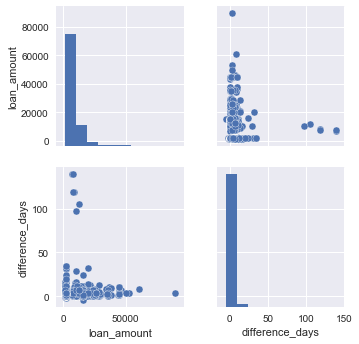

In [91]:
plt.figure(figsize=(20,20))
sns.pairplot(corr)

> ### Dealy in installation, though low, reduces as loan size increases

## row number 4113 was entered incorrectly in multiple ways: loan amount,  loan_application_date, village name

## 4 cases of loan applied after installation found